In [1]:
# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [2]:
df_rose=pd.read_csv('Rose.csv',parse_dates=True,index_col='YearMonth')

In [3]:
df_rose.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [4]:
df_rose.tail()

,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [5]:
df_rose.shape

(187, 1)

In [6]:
df_rose['Year']=df_rose.index.year
df_rose['Month']=df_rose.index.month
df_rose.head()

,Rose,Year,Month
YearMonth,,,
1980-01-01,112.0,1980,1
1980-02-01,118.0,1980,2
1980-03-01,129.0,1980,3
1980-04-01,99.0,1980,4
1980-05-01,116.0,1980,5


In [7]:
df_rose.columns=['Sales', 'Year', 'Month']

In [8]:
df_rose.head()

,Sales,Year,Month
YearMonth,,,
1980-01-01,112.0,1980,1
1980-02-01,118.0,1980,2
1980-03-01,129.0,1980,3
1980-04-01,99.0,1980,4
1980-05-01,116.0,1980,5


In [9]:
df_rose.describe()

,Sales,Year,Month
count,185.000000,187.000000,187.000000
mean,90.394595,1987.299465,6.406417
std,39.175344,4.514749,3.450972
min,28.000000,1980.000000,1.000000
25%,63.000000,1983.000000,3.000000
50%,86.000000,1987.000000,6.000000
75%,112.000000,1991.000000,9.000000
max,267.000000,1995.000000,12.000000


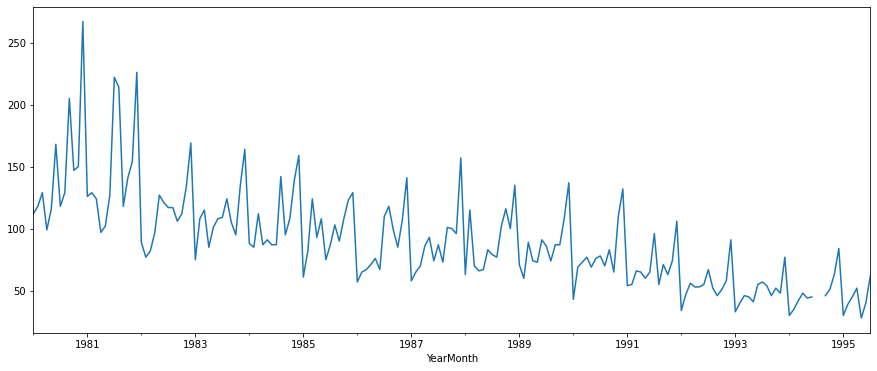

In [10]:
plt.figure(figsize=(15,6))
df_rose['Sales'].plot()

In [14]:
df_rose[df_rose['Sales'].isna()]

,Sales,Year,Month
YearMonth,,,
1994-07-01,NaN,1994,7
1994-08-01,NaN,1994,8


In [15]:
df_rose['Sales_Full_Mean']=df_rose['Sales']
df_rose['Sales_Linear']=df_rose['Sales']
df_rose['Sales_Spline']=df_rose['Sales']
df_rose['Sales_Before_After_Mean']=df_rose['Sales']

In [16]:
df_rose.head()

,Sales,Year,Month,Sales_Full_Mean,Sales_Linear,Sales_Spline,Sales_Before_After_Mean
YearMonth,,,,,,,
1980-01-01,112.0,1980,1,112.0,112.0,112.0,112.0
1980-02-01,118.0,1980,2,118.0,118.0,118.0,118.0
1980-03-01,129.0,1980,3,129.0,129.0,129.0,129.0
1980-04-01,99.0,1980,4,99.0,99.0,99.0,99.0
1980-05-01,116.0,1980,5,116.0,116.0,116.0,116.0


## Manual - Full Mean

In [17]:
np.mean(df_rose[df_rose.Month==7]['Sales'])

97.46666666666667

In [18]:
np.mean(df_rose[df_rose.Month==8]['Sales'])

100.14285714285714

In [19]:
df_rose.loc['1994-07-01', 'Sales_Full_Mean'] = np.mean(df_rose[df_rose.Month==7]['Sales'])

In [20]:
idx = pd.IndexSlice
df_rose.loc[idx['1994-07-01']]

Sales                              NaN
Year                       1994.000000
Month                         7.000000
Sales_Full_Mean              97.466667
Sales_Linear                       NaN
Sales_Spline                       NaN
Sales_Before_After_Mean            NaN
Name: 1994-07-01 00:00:00, dtype: float64

In [21]:
df_rose.loc['1994-08-01', 'Sales_Full_Mean'] = np.mean(df_rose[df_rose.Month==8]['Sales'])

In [22]:
df_rose.loc[idx['1994-08-01']]

Sales                              NaN
Year                       1994.000000
Month                         8.000000
Sales_Full_Mean             100.142857
Sales_Linear                       NaN
Sales_Spline                       NaN
Sales_Before_After_Mean            NaN
Name: 1994-08-01 00:00:00, dtype: float64

In [23]:
df_rose[df_rose['Sales_Full_Mean'].isna()]

,Sales,Year,Month,Sales_Full_Mean,Sales_Linear,Sales_Spline,Sales_Before_After_Mean
YearMonth,,,,,,,


In [24]:
df_rose.loc['1994-07-01':'1994-08-01']

,Sales,Year,Month,Sales_Full_Mean,Sales_Linear,Sales_Spline,Sales_Before_After_Mean
YearMonth,,,,,,,
1994-07-01,NaN,1994,7,97.466667,NaN,NaN,NaN
1994-08-01,NaN,1994,8,100.142857,NaN,NaN,NaN


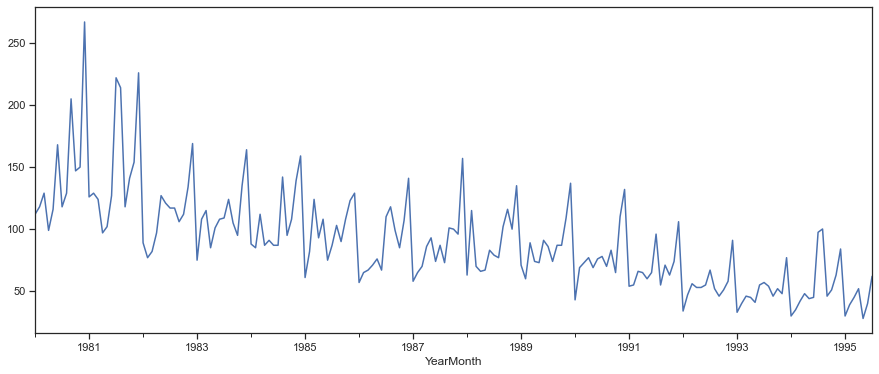

In [25]:
plt.figure(figsize=(15,6))
df_rose['Sales_Full_Mean'].plot()

## Interpolate - Linear

In [26]:
df_rose["Sales_Linear"]=df_rose['Sales'].interpolate(method='linear')

In [27]:
df_rose[df_rose['Sales_Linear'].isna()]

,Sales,Year,Month,Sales_Full_Mean,Sales_Linear,Sales_Spline,Sales_Before_After_Mean
YearMonth,,,,,,,


In [28]:
df_rose.loc['1994-07-01':'1994-08-01']

,Sales,Year,Month,Sales_Full_Mean,Sales_Linear,Sales_Spline,Sales_Before_After_Mean
YearMonth,,,,,,,
1994-07-01,NaN,1994,7,97.466667,45.333333,NaN,NaN
1994-08-01,NaN,1994,8,100.142857,45.666667,NaN,NaN


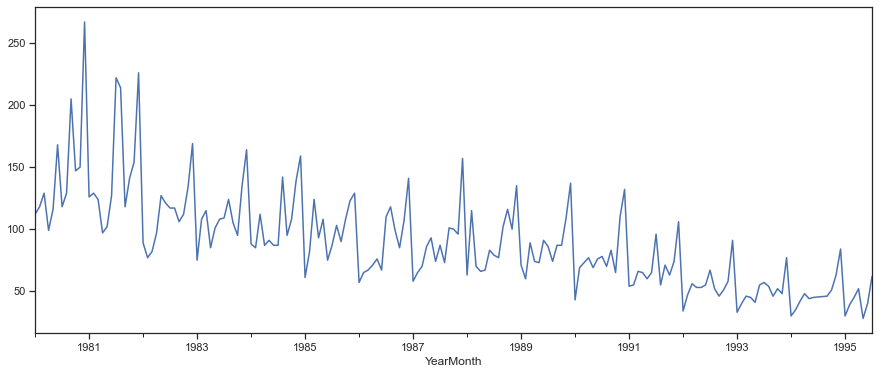

In [29]:
plt.figure(figsize=(15,6))
df_rose['Sales_Linear'].plot()

## Interpolate - Spline , order 2 

In [30]:
df_rose["Sales_Spline"]=df_rose['Sales'].interpolate(method='spline',order=2)

In [31]:
df_rose[df_rose['Sales_Spline'].isna()]

,Sales,Year,Month,Sales_Full_Mean,Sales_Linear,Sales_Spline,Sales_Before_After_Mean
YearMonth,,,,,,,


In [32]:
df_rose.loc['1994-07-01':'1994-08-01']

,Sales,Year,Month,Sales_Full_Mean,Sales_Linear,Sales_Spline,Sales_Before_After_Mean
YearMonth,,,,,,,
1994-07-01,NaN,1994,7,97.466667,45.333333,45.34978,NaN
1994-08-01,NaN,1994,8,100.142857,45.666667,44.51237,NaN


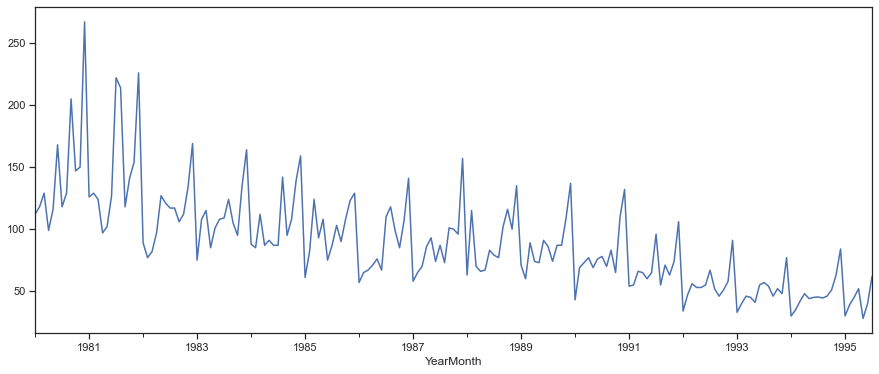

In [33]:
plt.figure(figsize=(15,6))
df_rose['Sales_Spline'].plot()

## Manual - Before After Mean

In [34]:
np.mean(df_rose[df_rose.Month==7]['1993-07-01':'1995-07-01']['Sales'])

59.5

In [35]:
df_rose.loc['1994-07-01', 'Sales_Before_After_Mean']=np.mean(
    df_rose[df_rose.Month==7]['1993-07-01':'1995-07-01']['Sales'])

In [36]:
df_rose.loc['1994-08-01', 'Sales_Before_After_Mean']=np.mean(
    df_rose[df_rose.Month==8]['1993-08-01':'1995-08-01']['Sales'])

In [37]:
df_rose[df_rose['Sales_Before_After_Mean'].isna()]

,Sales,Year,Month,Sales_Full_Mean,Sales_Linear,Sales_Spline,Sales_Before_After_Mean
YearMonth,,,,,,,


In [38]:
df_rose.loc['1994-07-01':'1994-08-01']

,Sales,Year,Month,Sales_Full_Mean,Sales_Linear,Sales_Spline,Sales_Before_After_Mean
YearMonth,,,,,,,
1994-07-01,NaN,1994,7,97.466667,45.333333,45.34978,59.5
1994-08-01,NaN,1994,8,100.142857,45.666667,44.51237,54.0


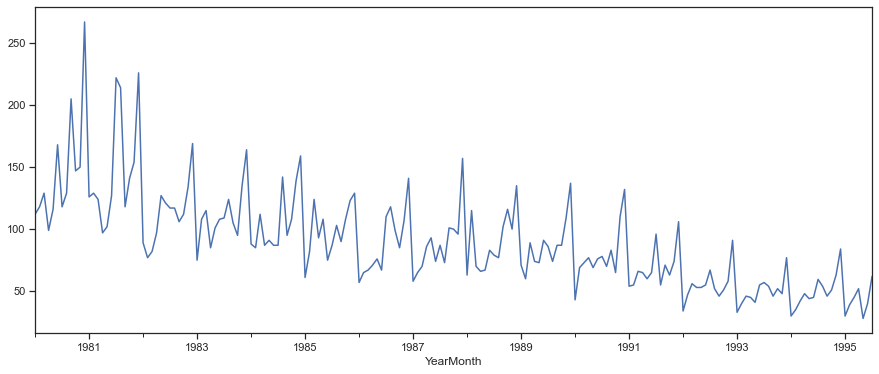

In [39]:
plt.figure(figsize=(15,6))
df_rose['Sales_Before_After_Mean'].plot()

## -----

In [40]:
df_rose[df_rose.Year==1991]

,Sales,Year,Month,Sales_Full_Mean,Sales_Linear,Sales_Spline,Sales_Before_After_Mean
YearMonth,,,,,,,
1991-01-01,54.0,1991,1,54.0,54.0,54.0,54.0
1991-02-01,55.0,1991,2,55.0,55.0,55.0,55.0
1991-03-01,66.0,1991,3,66.0,66.0,66.0,66.0
1991-04-01,65.0,1991,4,65.0,65.0,65.0,65.0
1991-05-01,60.0,1991,5,60.0,60.0,60.0,60.0
1991-06-01,65.0,1991,6,65.0,65.0,65.0,65.0
1991-07-01,96.0,1991,7,96.0,96.0,96.0,96.0
1991-08-01,55.0,1991,8,55.0,55.0,55.0,55.0
1991-09-01,71.0,1991,9,71.0,71.0,71.0,71.0


In [41]:
df_rose[df_rose.Year==1992]

,Sales,Year,Month,Sales_Full_Mean,Sales_Linear,Sales_Spline,Sales_Before_After_Mean
YearMonth,,,,,,,
1992-01-01,34.0,1992,1,34.0,34.0,34.0,34.0
1992-02-01,47.0,1992,2,47.0,47.0,47.0,47.0
1992-03-01,56.0,1992,3,56.0,56.0,56.0,56.0
1992-04-01,53.0,1992,4,53.0,53.0,53.0,53.0
1992-05-01,53.0,1992,5,53.0,53.0,53.0,53.0
1992-06-01,55.0,1992,6,55.0,55.0,55.0,55.0
1992-07-01,67.0,1992,7,67.0,67.0,67.0,67.0
1992-08-01,52.0,1992,8,52.0,52.0,52.0,52.0
1992-09-01,46.0,1992,9,46.0,46.0,46.0,46.0


In [42]:
df_rose[df_rose.Year==1993]

,Sales,Year,Month,Sales_Full_Mean,Sales_Linear,Sales_Spline,Sales_Before_After_Mean
YearMonth,,,,,,,
1993-01-01,33.0,1993,1,33.0,33.0,33.0,33.0
1993-02-01,40.0,1993,2,40.0,40.0,40.0,40.0
1993-03-01,46.0,1993,3,46.0,46.0,46.0,46.0
1993-04-01,45.0,1993,4,45.0,45.0,45.0,45.0
1993-05-01,41.0,1993,5,41.0,41.0,41.0,41.0
1993-06-01,55.0,1993,6,55.0,55.0,55.0,55.0
1993-07-01,57.0,1993,7,57.0,57.0,57.0,57.0
1993-08-01,54.0,1993,8,54.0,54.0,54.0,54.0
1993-09-01,46.0,1993,9,46.0,46.0,46.0,46.0


In [43]:
df_rose[df_rose.Year==1994]

,Sales,Year,Month,Sales_Full_Mean,Sales_Linear,Sales_Spline,Sales_Before_After_Mean
YearMonth,,,,,,,
1994-01-01,30.0,1994,1,30.000000,30.000000,30.00000,30.0
1994-02-01,35.0,1994,2,35.000000,35.000000,35.00000,35.0
1994-03-01,42.0,1994,3,42.000000,42.000000,42.00000,42.0
1994-04-01,48.0,1994,4,48.000000,48.000000,48.00000,48.0
1994-05-01,44.0,1994,5,44.000000,44.000000,44.00000,44.0
1994-06-01,45.0,1994,6,45.000000,45.000000,45.00000,45.0
1994-07-01,NaN,1994,7,97.466667,45.333333,45.34978,59.5
1994-08-01,NaN,1994,8,100.142857,45.666667,44.51237,54.0
1994-09-01,46.0,1994,9,46.000000,46.000000,46.00000,46.0


In [44]:
df_rose[df_rose.Year==1995]

,Sales,Year,Month,Sales_Full_Mean,Sales_Linear,Sales_Spline,Sales_Before_After_Mean
YearMonth,,,,,,,
1995-01-01,30.0,1995,1,30.0,30.0,30.0,30.0
1995-02-01,39.0,1995,2,39.0,39.0,39.0,39.0
1995-03-01,45.0,1995,3,45.0,45.0,45.0,45.0
1995-04-01,52.0,1995,4,52.0,52.0,52.0,52.0
1995-05-01,28.0,1995,5,28.0,28.0,28.0,28.0
1995-06-01,40.0,1995,6,40.0,40.0,40.0,40.0
1995-07-01,62.0,1995,7,62.0,62.0,62.0,62.0


In [45]:
df_rose[df_rose.Month==7]

,Sales,Year,Month,Sales_Full_Mean,Sales_Linear,Sales_Spline,Sales_Before_After_Mean
YearMonth,,,,,,,
1980-07-01,118.0,1980,7,118.000000,118.000000,118.00000,118.0
1981-07-01,222.0,1981,7,222.000000,222.000000,222.00000,222.0
1982-07-01,117.0,1982,7,117.000000,117.000000,117.00000,117.0
1983-07-01,109.0,1983,7,109.000000,109.000000,109.00000,109.0
1984-07-01,87.0,1984,7,87.000000,87.000000,87.00000,87.0
1985-07-01,87.0,1985,7,87.000000,87.000000,87.00000,87.0
1986-07-01,110.0,1986,7,110.000000,110.000000,110.00000,110.0
1987-07-01,87.0,1987,7,87.000000,87.000000,87.00000,87.0
1988-07-01,79.0,1988,7,79.000000,79.000000,79.00000,79.0


In [46]:
df_rose[df_rose.Month==8]

,Sales,Year,Month,Sales_Full_Mean,Sales_Linear,Sales_Spline,Sales_Before_After_Mean
YearMonth,,,,,,,
1980-08-01,129.0,1980,8,129.000000,129.000000,129.00000,129.0
1981-08-01,214.0,1981,8,214.000000,214.000000,214.00000,214.0
1982-08-01,117.0,1982,8,117.000000,117.000000,117.00000,117.0
1983-08-01,124.0,1983,8,124.000000,124.000000,124.00000,124.0
1984-08-01,142.0,1984,8,142.000000,142.000000,142.00000,142.0
1985-08-01,103.0,1985,8,103.000000,103.000000,103.00000,103.0
1986-08-01,118.0,1986,8,118.000000,118.000000,118.00000,118.0
1987-08-01,73.0,1987,8,73.000000,73.000000,73.00000,73.0
1988-08-01,77.0,1988,8,77.000000,77.000000,77.00000,77.0


## Looking at above figures, we completely eleminate the Full_Mean approach as the figures seem to be on  a very higher side, when compared to the trends of recent years around the year 1994.

## Linear Interpolation comes a little closer to the actual values, however the value seems to be a little lower given that there has historically been a boost in sales in the months of July and August.


## Spline interpolation figures too were on the lower side and were pretty similar to linear interpolation hence not choosen.

## Thus using Mean from a year before and a year after the year 1994 which had missing data, made most sense and gave values in line with the recent trends also.

# Dropping other Sales column and renaming "Sales_Before_After_Mean" to "Sales"

In [47]:
df_rose.drop(['Sales','Sales_Full_Mean','Sales_Linear','Sales_Spline'],inplace=True,axis=1)
df_rose

,Year,Month,Sales_Before_After_Mean
YearMonth,,,
1980-01-01,1980,1,112.0
1980-02-01,1980,2,118.0
1980-03-01,1980,3,129.0
1980-04-01,1980,4,99.0
1980-05-01,1980,5,116.0
...,...,...,...
1995-03-01,1995,3,45.0
1995-04-01,1995,4,52.0
1995-05-01,1995,5,28.0


In [48]:
df_rose.columns=['Year', 'Month', 'Sales']

In [49]:
df_rose.head()

,Year,Month,Sales
YearMonth,,,
1980-01-01,1980,1,112.0
1980-02-01,1980,2,118.0
1980-03-01,1980,3,129.0
1980-04-01,1980,4,99.0
1980-05-01,1980,5,116.0


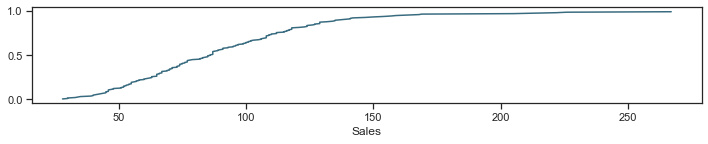

In [11]:
    ## Plot ECDF: Empirical Cumulative Distribution Function
#ECDF - Adds up the number of observations that are there for a certain value.
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

  
plt.subplot(312)
cdf = ECDF(df_rose['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Sales');

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

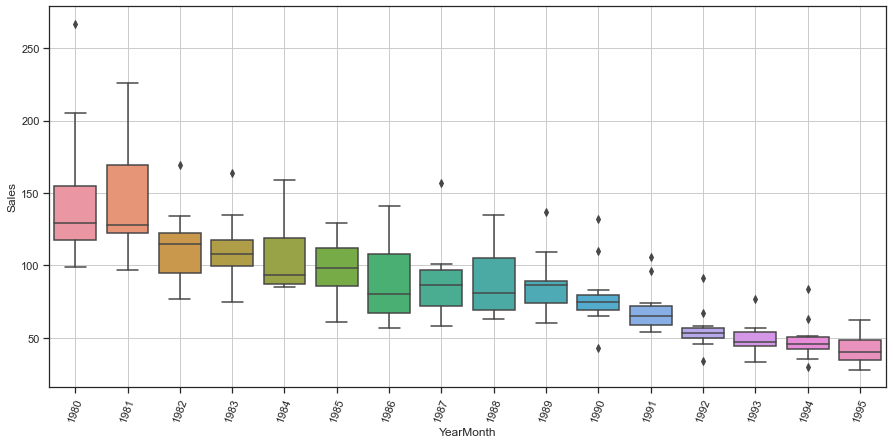

In [12]:
plt.figure(figsize=(15,7))
sns.boxplot(x = df_rose.index.year,y = df_rose['Sales'])
plt.grid();
plt.xticks(rotation=70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

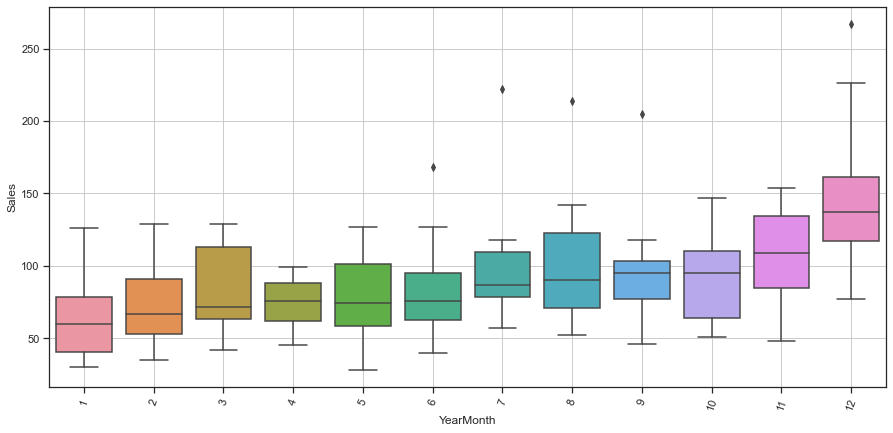

In [13]:
plt.figure(figsize=(15,7))
sns.boxplot(x = df_rose.index.month,y = df_rose['Sales'])
plt.grid();
plt.xticks(rotation=70)

## Plot a graph of monthly sales across years.

In [50]:
monthly_sales_across_years = pd.pivot_table(df_rose, values = 'Sales', columns = 
                                            df_rose.index.month_name(), index = df_rose.index.year)
monthly_sales_across_years

YearMonth,April,August,December,February,January,July,June,March,May,November,October,September
YearMonth,,,,,,,,,,,,
1980,99.0,129.0,267.0,118.0,112.0,118.0,168.0,129.0,116.0,150.0,147.0,205.0
1981,97.0,214.0,226.0,129.0,126.0,222.0,127.0,124.0,102.0,154.0,141.0,118.0
1982,97.0,117.0,169.0,77.0,89.0,117.0,121.0,82.0,127.0,134.0,112.0,106.0
1983,85.0,124.0,164.0,108.0,75.0,109.0,108.0,115.0,101.0,135.0,95.0,105.0
1984,87.0,142.0,159.0,85.0,88.0,87.0,87.0,112.0,91.0,139.0,108.0,95.0
1985,93.0,103.0,129.0,82.0,61.0,87.0,75.0,124.0,108.0,123.0,108.0,90.0
1986,71.0,118.0,141.0,65.0,57.0,110.0,67.0,67.0,76.0,107.0,85.0,99.0
1987,86.0,73.0,157.0,65.0,58.0,87.0,74.0,70.0,93.0,96.0,100.0,101.0
1988,66.0,77.0,135.0,115.0,63.0,79.0,83.0,70.0,67.0,100.0,116.0,102.0


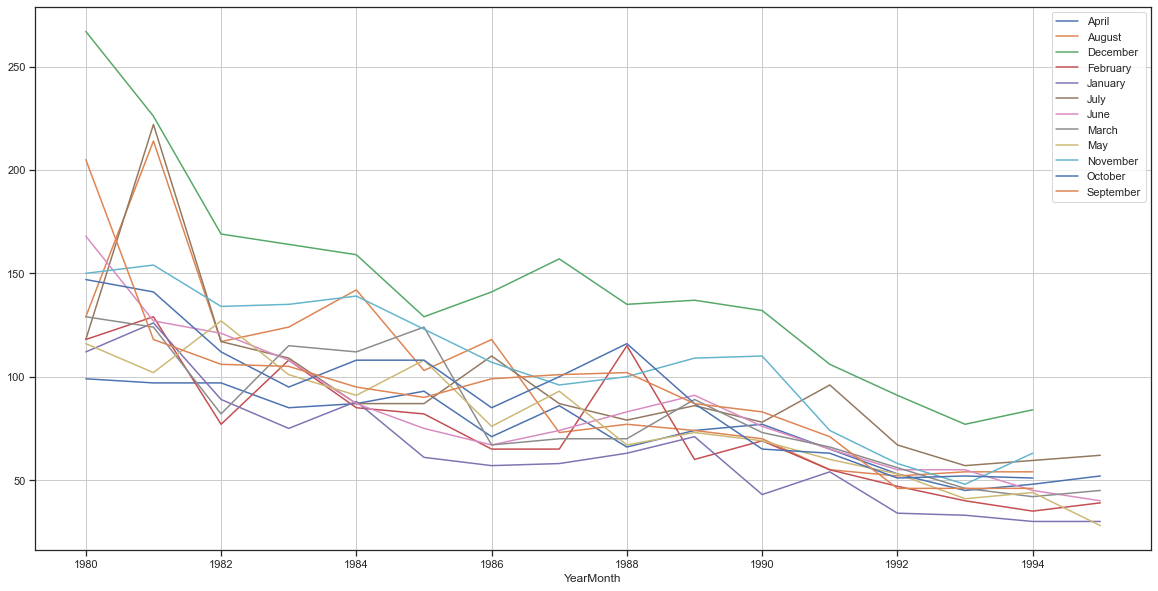

In [51]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

## 3 - year Sales Graph

YearMonth
1980-12-31    1758.0
1983-12-31    4452.0
1986-12-31    3526.0
1989-12-31    3171.0
1992-12-31    2438.0
Freq: 3A-DEC, Name: Sales, dtype: float64


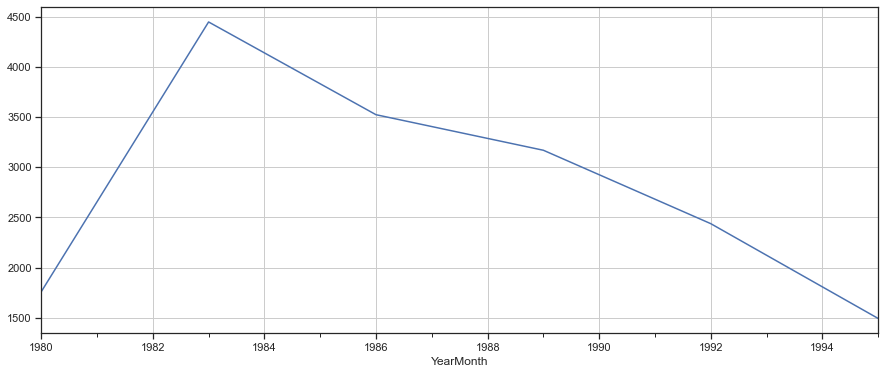

In [52]:
resample = df_rose['Sales'].resample('3Y')
yearly_mean_sales = resample.sum()
print(yearly_mean_sales.head() )
plt.figure(figsize=(15,6))
yearly_mean_sales.plot()

plt.grid()
plt.show()

## Quaterly Sales Graph - DownSampling

YearMonth
1980-03-31    119.666667
1980-06-30    127.666667
1980-09-30    150.666667
1980-12-31    188.000000
1981-03-31    126.333333
Freq: Q-DEC, Name: Sales, dtype: float64


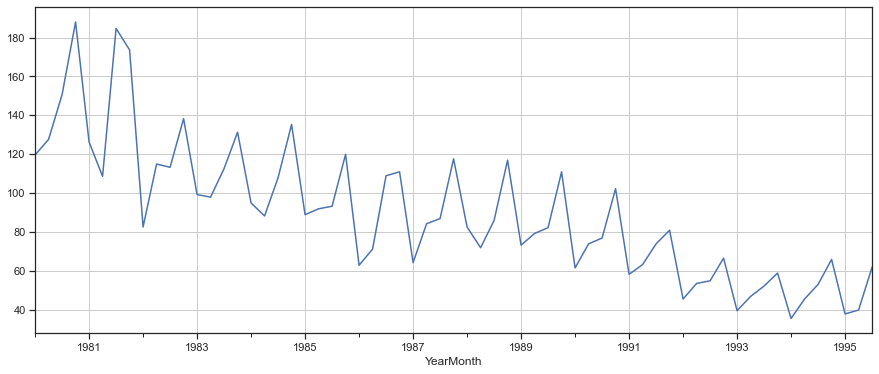

In [53]:
resample             = df_rose['Sales'].resample('Q')
quarterly_mean_sales = resample.mean()
print(quarterly_mean_sales.head())
plt.figure(figsize=(15,6))
quarterly_mean_sales.plot()
plt.grid()
plt.show()

(array([25., 53., 42., 35., 20.,  7.,  0.,  2.,  2.,  1.]),
 array([ 28. ,  51.9,  75.8,  99.7, 123.6, 147.5, 171.4, 195.3, 219.2,
        243.1, 267. ]),
 <a list of 10 Patch objects>)

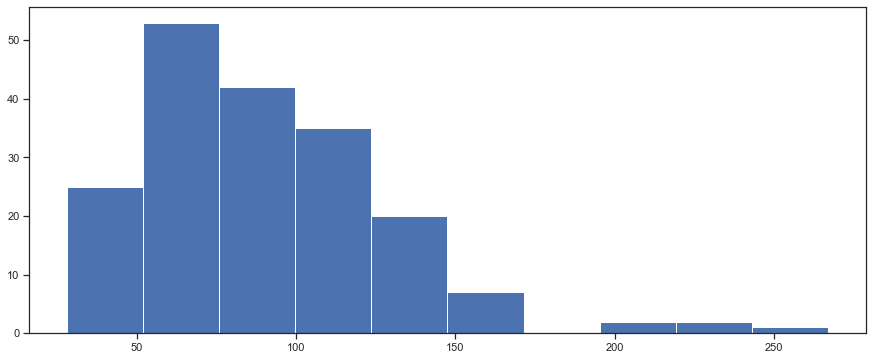

In [54]:
plt.figure(figsize=(15,6))
plt.hist(df_rose['Sales'])

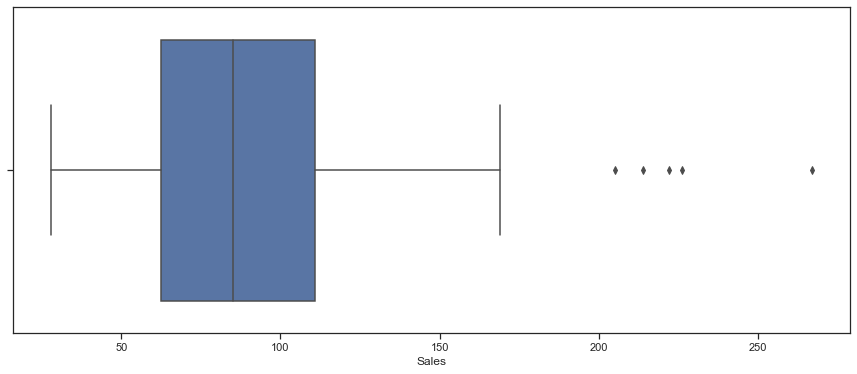

In [55]:
plt.figure(figsize=(15,6))
sns.boxplot(df_rose['Sales'])

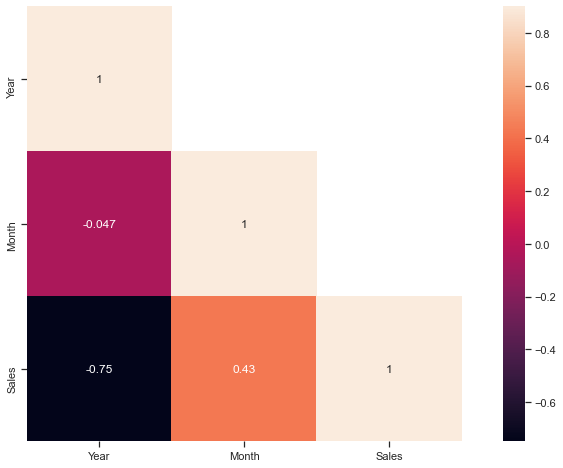

In [56]:
corr_all = df_rose.corr()
mask = np.array(corr_all)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(corr_all, mask=mask,vmax=.9, square=True,annot=True);
plt.show()

In [350]:
for i in np.arange(0,31):
    df_rose['lag'+str(i)]=df_rose['Sales']-df_rose['Sales'].shift(i)

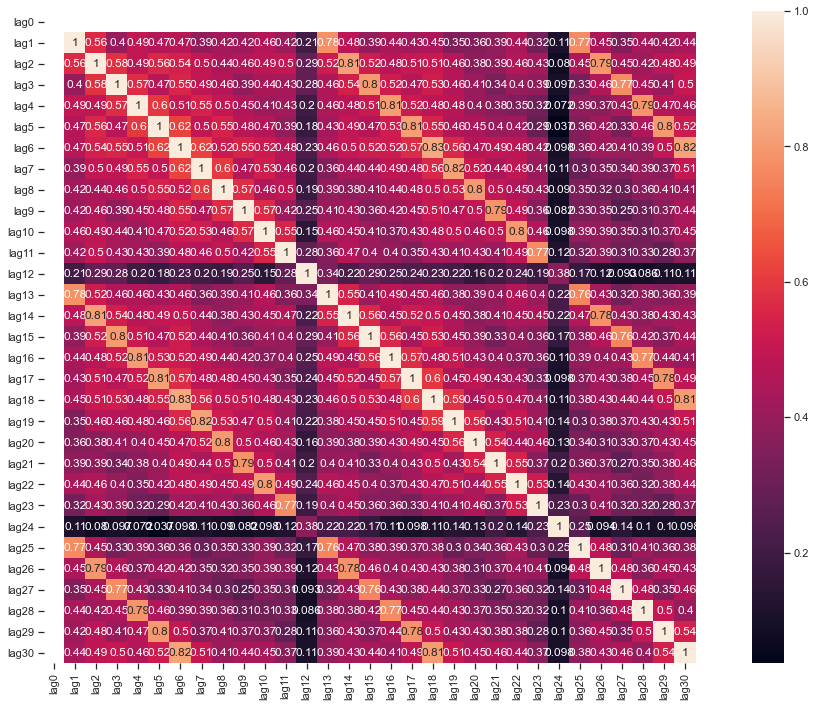

In [351]:
corr_all = df_rose.drop(['Sales','Year','Month'],axis=1).corr()
fig,ax= plt.subplots()
fig.set_size_inches(20,12)
sns.heatmap(corr_all,annot=True,square=True)

In [352]:
df_rose.drop(['lag0', 'lag1', 'lag2', 'lag3', 'lag4',
       'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12',
       'lag13', 'lag14', 'lag15', 'lag16', 'lag17', 'lag18', 'lag19', 'lag20','lag21', 'lag22', 'lag23', 'lag24', 'lag25',
       'lag26', 'lag27', 'lag28', 'lag29', 'lag30'],axis=1,inplace=True)
df_rose.head()

,Year,Month,Sales
YearMonth,,,
1980-01-01,1980,1,112.0
1980-02-01,1980,2,118.0
1980-03-01,1980,3,129.0
1980-04-01,1980,4,99.0
1980-05-01,1980,5,116.0


# Decomposition

In [65]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

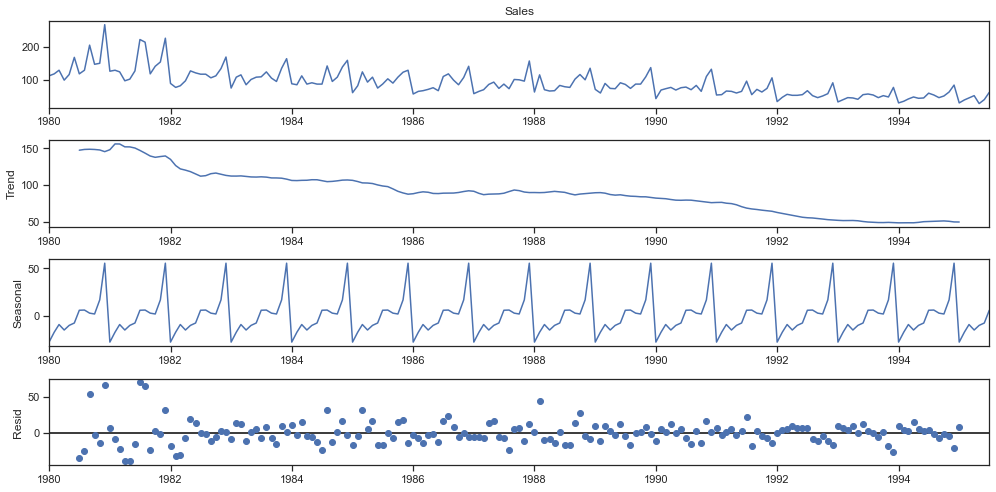

In [66]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

decomposition = seasonal_decompose(df_rose['Sales'],model='additive')
decomposition.plot();

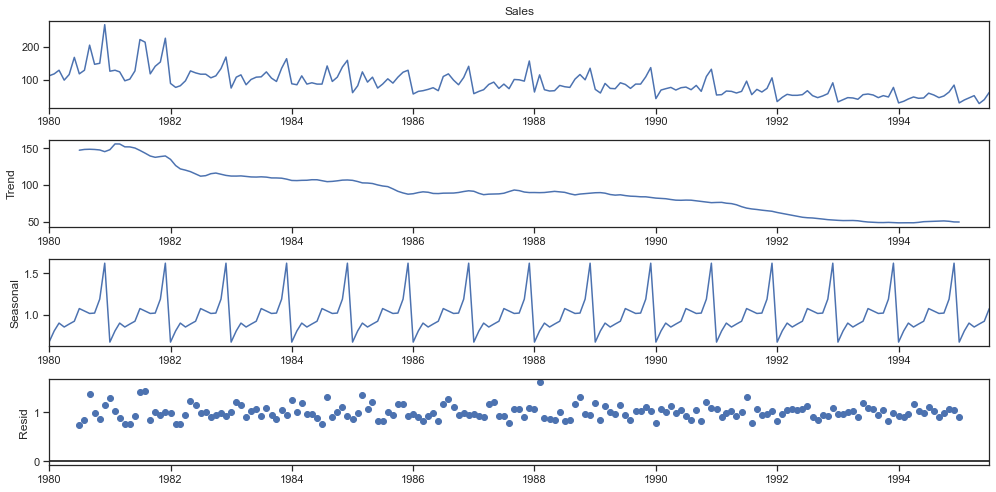

In [353]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

decomposition = seasonal_decompose(df_rose['Sales'],model='multiplicative')
decomposition.plot();

In [68]:
decomposition.trend

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: trend, Length: 187, dtype: float64

In [354]:
decomposition.seasonal

YearMonth
1980-01-01    0.668577
1980-02-01    0.804550
1980-03-01    0.898744
1980-04-01    0.851237
1980-05-01    0.886934
                ...   
1995-03-01    0.898744
1995-04-01    0.851237
1995-05-01    0.886934
1995-06-01    0.921546
1995-07-01    1.074644
Name: seasonal, Length: 187, dtype: float64

In [70]:
decomposition.resid

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: resid, Length: 187, dtype: float64

## Since residue do not form a flat line in both Multiplicative as well as Additive, we take range of residual as the deciding factor, hence we choose Multiplicative model, since the range is 0 to 1 compared to 0 to +/- 50 in additive

# Splitting into Test and Train

In [71]:
train = df_rose[df_rose.index<'1991'] 
test = df_rose[df_rose.index>='1991']

In [72]:
train.tail()

,Year,Month,Sales
YearMonth,,,
1990-08-01,1990,8,70.0
1990-09-01,1990,9,83.0
1990-10-01,1990,10,65.0
1990-11-01,1990,11,110.0
1990-12-01,1990,12,132.0


In [73]:
test.head()

,Year,Month,Sales
YearMonth,,,
1991-01-01,1991,1,54.0
1991-02-01,1991,2,55.0
1991-03-01,1991,3,66.0
1991-04-01,1991,4,65.0
1991-05-01,1991,5,60.0


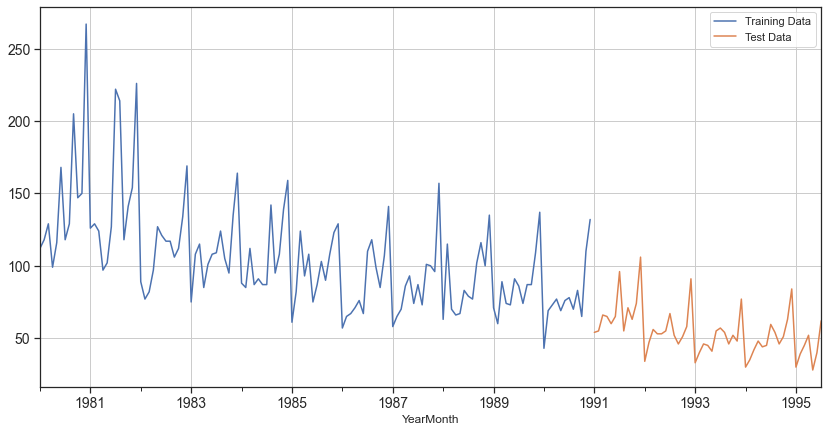

In [74]:
train['Sales'].plot(fontsize=14)
test['Sales'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Model 1 - Linear Regression Model

In [75]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [76]:
print(len(train))
print(len(test))

132
55


In [77]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [78]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Year,Month,Sales,time
YearMonth,,,,
1980-01-01,1980,1,112.0,1
1980-02-01,1980,2,118.0,2
1980-03-01,1980,3,129.0,3
1980-04-01,1980,4,99.0,4
1980-05-01,1980,5,116.0,5


Last few rows of Training Data


,Year,Month,Sales,time
YearMonth,,,,
1990-08-01,1990,8,70.0,128
1990-09-01,1990,9,83.0,129
1990-10-01,1990,10,65.0,130
1990-11-01,1990,11,110.0,131
1990-12-01,1990,12,132.0,132


First few rows of Test Data


,Year,Month,Sales,time
YearMonth,,,,
1991-01-01,1991,1,54.0,133
1991-02-01,1991,2,55.0,134
1991-03-01,1991,3,66.0,135
1991-04-01,1991,4,65.0,136
1991-05-01,1991,5,60.0,137


Last few rows of Test Data


,Year,Month,Sales,time
YearMonth,,,,
1995-03-01,1995,3,45.0,183
1995-04-01,1995,4,52.0,184
1995-05-01,1995,5,28.0,185
1995-06-01,1995,6,40.0,186
1995-07-01,1995,7,62.0,187


In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
lr = LinearRegression()

In [81]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sales'])

LinearRegression()

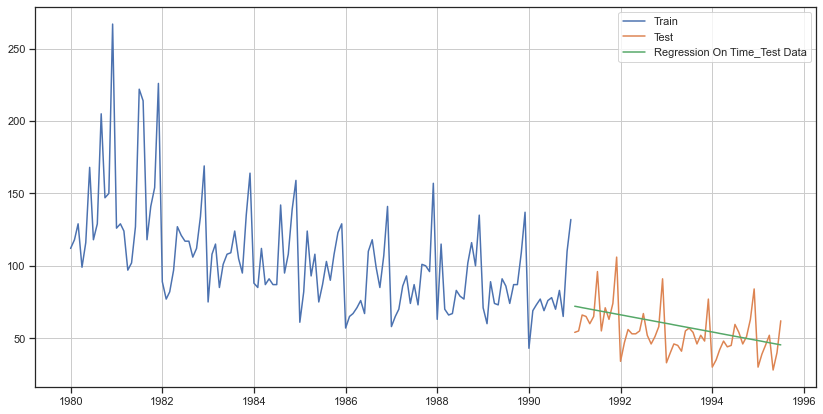

In [82]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

### Model Evaluation

In [83]:
from sklearn import metrics

In [84]:
rmse_model1_test = metrics.mean_squared_error(test['Sales'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.278 


In [85]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,15.278158


# Model 2 - Naive Bayes Model

In [86]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [87]:
NaiveModel_test['naive'] = np.asarray(train['Sales'])[len(np.asarray(train['Sales']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

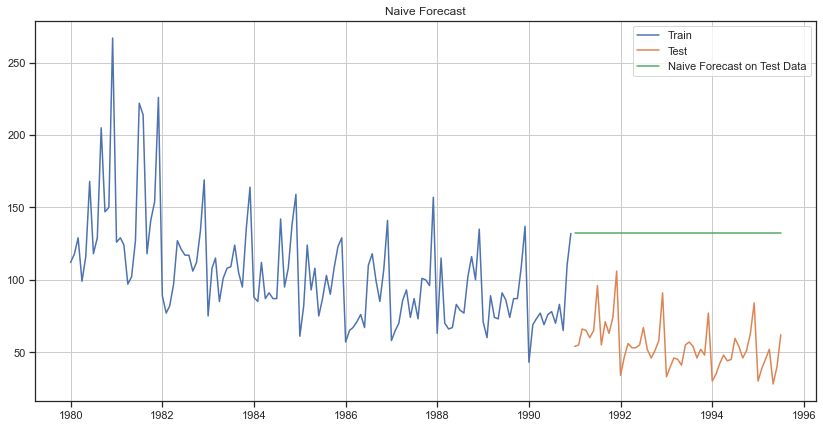

In [88]:
plt.plot(NaiveModel_train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [89]:
rmse_model2_test = metrics.mean_squared_error(test['Sales'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.304


In [90]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,15.278158
NaiveModel,79.304391


# Model 3 - Simple Average

In [91]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [92]:
SimpleAverage_test['mean_forecast'] = train['Sales'].mean()
SimpleAverage_test.head()

,Year,Month,Sales,mean_forecast
YearMonth,,,,
1991-01-01,1991,1,54.0,104.939394
1991-02-01,1991,2,55.0,104.939394
1991-03-01,1991,3,66.0,104.939394
1991-04-01,1991,4,65.0,104.939394
1991-05-01,1991,5,60.0,104.939394


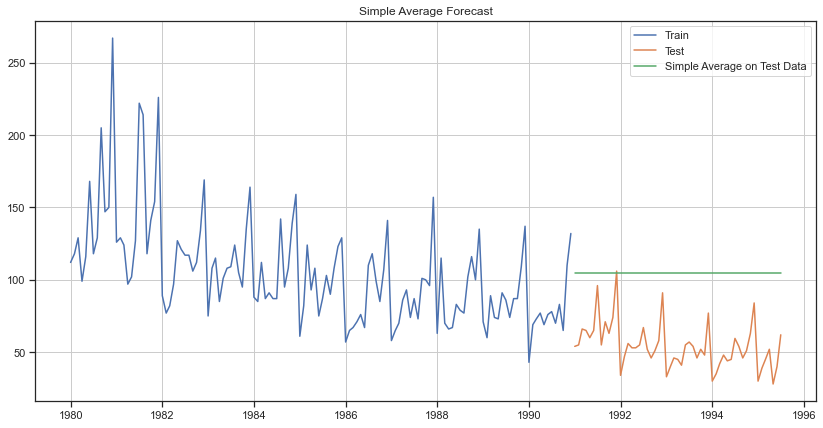

In [93]:
plt.plot(SimpleAverage_train['Sales'], label='Train')
plt.plot(SimpleAverage_test['Sales'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [94]:
rmse_model3_test = metrics.mean_squared_error(test['Sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.050


In [95]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,15.278158
NaiveModel,79.304391
SimpleAverageModel,53.049755


# Model 4 - Moving Average

In [96]:
MovingAverage = df_rose.copy()
MovingAverage.head()

,Year,Month,Sales
YearMonth,,,
1980-01-01,1980,1,112.0
1980-02-01,1980,2,118.0
1980-03-01,1980,3,129.0
1980-04-01,1980,4,99.0
1980-05-01,1980,5,116.0


In [97]:
MovingAverage['Trailing_2'] = MovingAverage['Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sales'].rolling(9).mean()

MovingAverage.head()

,Year,Month,Sales,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,,,
1980-01-01,1980,1,112.0,NaN,NaN,NaN,NaN
1980-02-01,1980,2,118.0,115.0,NaN,NaN,NaN
1980-03-01,1980,3,129.0,123.5,NaN,NaN,NaN
1980-04-01,1980,4,99.0,114.0,114.5,NaN,NaN
1980-05-01,1980,5,116.0,107.5,115.5,NaN,NaN


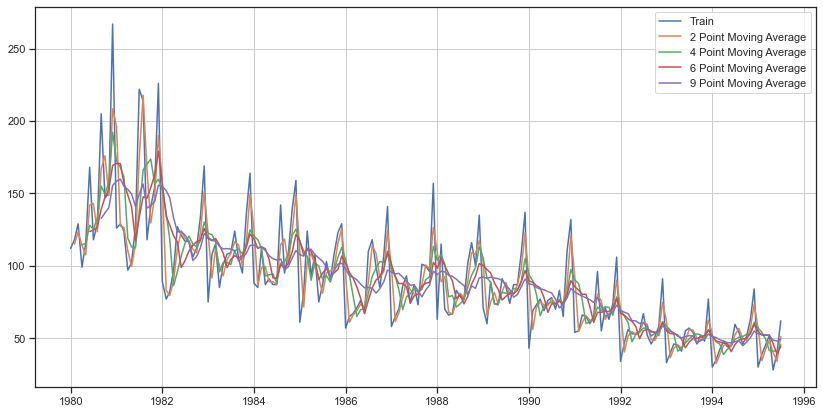

In [98]:
## Plotting on the whole data

plt.plot(MovingAverage['Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [99]:
trailing_MovingAverage_train = MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']

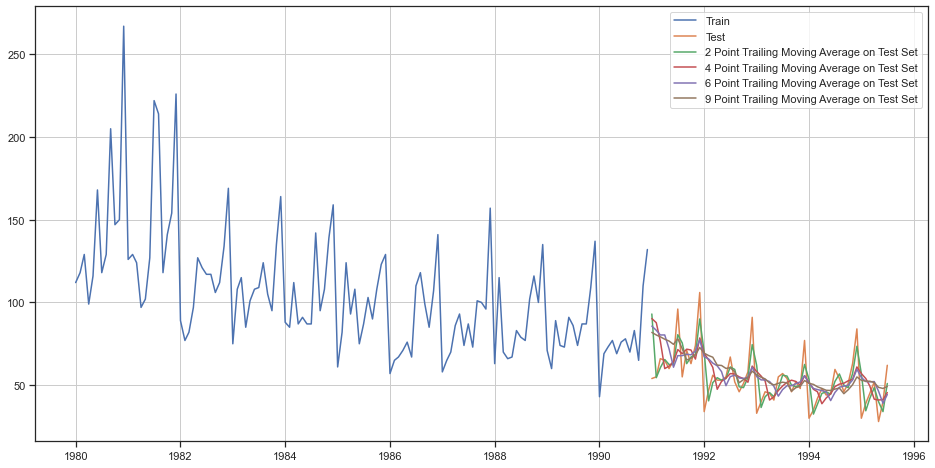

In [100]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sales'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

### Model Evaluation

In [101]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.589
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.506
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.558
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.797


In [102]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,15.278158
NaiveModel,79.304391
SimpleAverageModel,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139


# Plotting all models so far

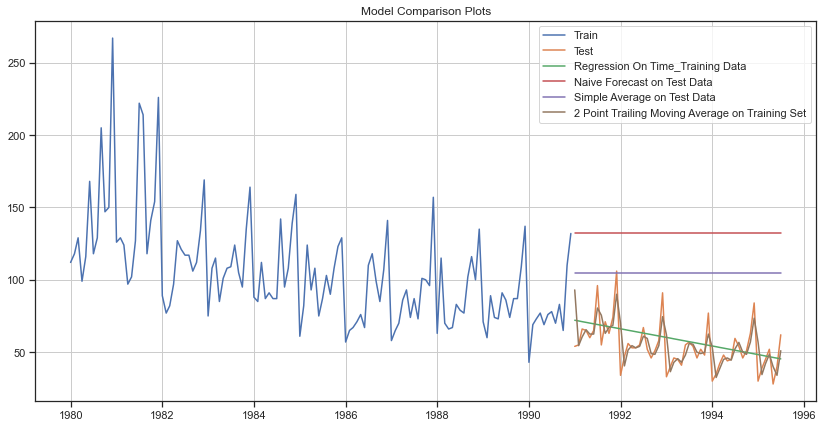

In [103]:
## Plotting on both Training and Test data

plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# Model 5 - Single Exponential Smoothing

In [104]:
SES_train=train.copy()
SES_test=test.copy()

In [105]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

,Alpha Values,Train RMSE,Test RMSE


In [106]:
# create class
model_SES = SimpleExpSmoothing(train['Sales'])

In [107]:
model_SES_autofit = model_SES.fit(optimized=True)

In [108]:
model_SES_autofit.params

{'smoothing_level': 0.09874989805931945,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.38695595667537,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [109]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Year,Month,Sales,predict
YearMonth,,,,
1991-01-01,1991,1,54.0,87.104999
1991-02-01,1991,2,55.0,87.104999
1991-03-01,1991,3,66.0,87.104999
1991-04-01,1991,4,65.0,87.104999
1991-05-01,1991,5,60.0,87.104999


In [110]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict'],squared=False)
print("For Alpha =0.09874 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.09874 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.398


In [113]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse_model5_test_1}
                           ,index=['Alpha=0.09874,SimpleExponentialSmoothing_Auto_Fit'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
RegressionOnTime,15.278158
NaiveModel,79.304391
SimpleAverageModel,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.09874,SimpleExponentialSmoothing_Auto_Fit",36.397792


In [121]:
del resultsDf_temp
## First we will define an empty dataframe to store our values from the loop

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

,Alpha Values,Train RMSE,Test RMSE


In [122]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict',i],squared=False)
    
    resultsDf_temp = resultsDf_temp.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

### Model Evaluation

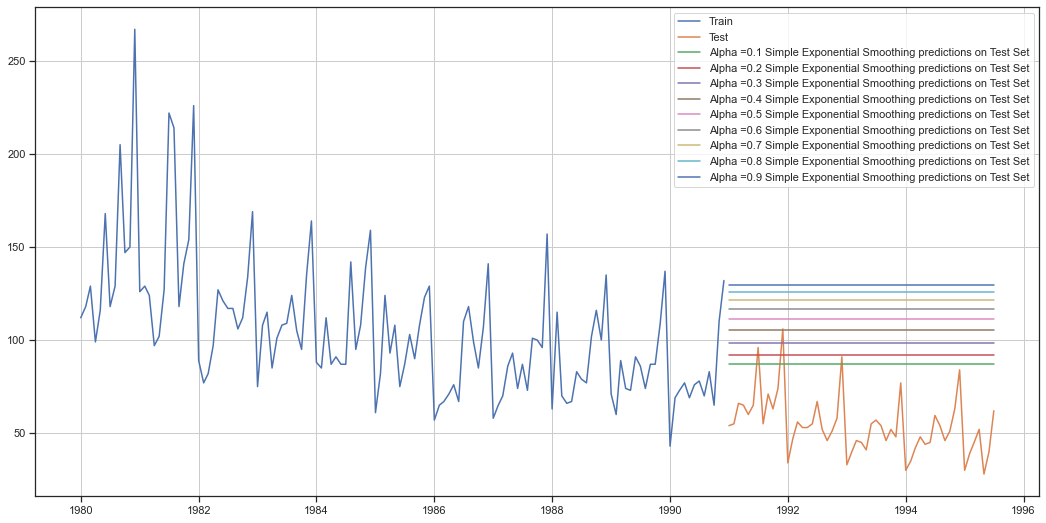

In [123]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.30000000000000004], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.5], label='Alpha =0.5 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.6], label='Alpha =0.6 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.7000000000000001], label='Alpha =0.7 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.8], label='Alpha =0.8 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.9], label='Alpha =0.9 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [124]:
resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.1,31.815610,36.429535
1,0.2,31.979391,40.957988
2,0.3,32.470164,47.096522
3,0.4,33.035130,53.356493
4,0.5,33.682839,59.229384
5,0.6,34.441171,64.558022
6,0.7,35.323261,69.284383
7,0.8,36.334596,73.359904
8,0.9,37.482782,76.725002


In [125]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,15.278158
NaiveModel,79.304391
SimpleAverageModel,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.09874,SimpleExponentialSmoothing_Auto_Fit",36.397792
"Alpha=0.1,SimpleExponentialSmoothing",36.429535


# Model 6 - Double Exponential Smoothing (Holts Model)

In [126]:
DES_train = train.copy()
DES_test = test.copy()

In [127]:
model_DES = Holt(DES_train['Sales'])

In [128]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [129]:
model_DES_autofit = model_DES.fit(optimized=True)

In [130]:
model_DES_autofit.params

{'smoothing_level': 0.15789473684210525,
 'smoothing_slope': 0.15789473684210525,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 112.0,
 'initial_slope': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [131]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

,Year,Month,Sales,predict
YearMonth,,,,
1991-01-01,1991,1,54.0,86.863579
1991-02-01,1991,2,55.0,88.028056
1991-03-01,1991,3,66.0,89.192534
1991-04-01,1991,4,65.0,90.357011
1991-05-01,1991,5,60.0,91.521488


In [132]:
## Test Data

rmse_model_temp = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict'],squared=False)
print("For Alpha =0.1578, Beta = 0.1578 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model_temp))


For Alpha =0.1578, Beta = 0.1578 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 36.398


In [133]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse_model_temp}
                           ,index=['Alpha=0.1578,Beta=0.1578,DoubleExponentialSmoothing_Auto_Fit'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
RegressionOnTime,15.278158
NaiveModel,79.304391
SimpleAverageModel,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.09874,SimpleExponentialSmoothing_Auto_Fit",36.397792
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha=0.1578,Beta=0.1578,DoubleExponentialSmoothing_Auto_Fit",36.397792


In [134]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [135]:
resultsDf_6

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,34.439111,36.510010
1,0.1,0.2,33.450729,48.221436
2,0.1,0.3,33.145789,77.649847
3,0.1,0.4,33.262191,99.064536
4,0.1,0.5,33.688415,123.742433
...,...,...,...,...
95,1.0,0.6,51.831610,801.137173
96,1.0,0.7,54.497039,841.349112
97,1.0,0.8,57.365879,853.421959
98,1.0,0.9,60.474309,834.167545


### Model Evaluation

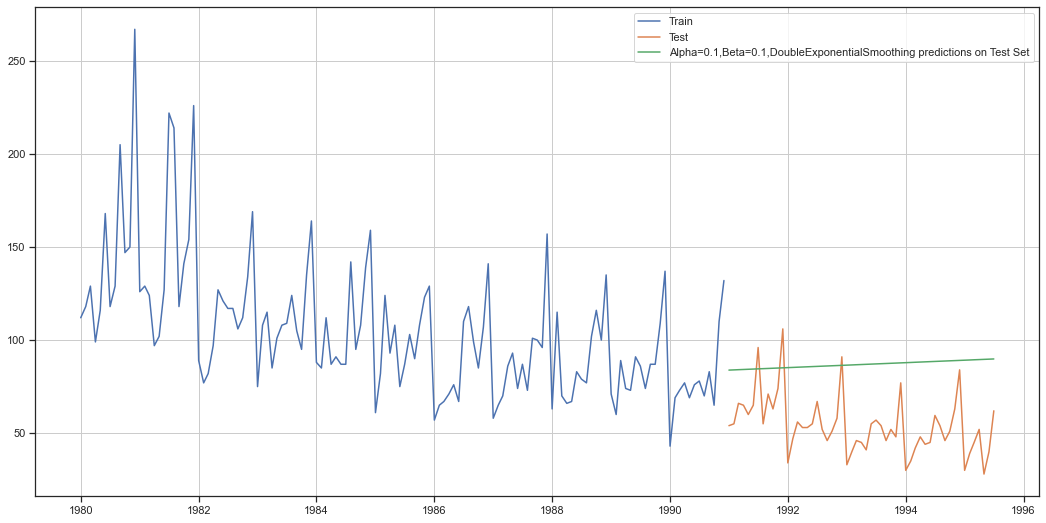

In [136]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [137]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,34.439111,36.510010
1,0.1,0.2,33.450729,48.221436
10,0.2,0.1,33.097427,65.251675
2,0.1,0.3,33.145789,77.649847
20,0.3,0.1,33.611269,98.152852


In [138]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE
RegressionOnTime,15.278158
NaiveModel,79.304391
SimpleAverageModel,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.09874,SimpleExponentialSmoothing_Auto_Fit",36.397792
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha=0.1578,Beta=0.1578,DoubleExponentialSmoothing_Auto_Fit",36.397792


# Model 7 - Tripple Exponential Smoothing (Holt - Winters Model)

In [140]:
TES_train = train.copy()
TES_test = test.copy()

In [141]:
model_TES_ta_sa = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='additive')
model_TES_ta_sm = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='multiplicative')
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
model_TES_tm_sa = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='additive')

In [142]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [143]:
model_TES_autofit_ta_sa = model_TES_ta_sa.fit(optimized=True)
model_TES_autofit_ta_sm = model_TES_ta_sm.fit(optimized=True)
model_TES_autofit_tm_sm = model_TES_tm_sm.fit(optimized=True)
model_TES_autofit_tm_sa = model_TES_tm_sa.fit(optimized=True)

In [144]:
model_TES_autofit_ta_sa.params

{'smoothing_level': 0.13348630377578782,
 'smoothing_slope': 0.01378547758953572,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 76.38705525396102,
 'initial_slope': 0.0,
 'initial_seasons': array([ 38.68373526,  51.01808923,  58.99079973,  48.32588272,
         57.11739113,  62.54333192,  72.42693931,  78.50000507,
         74.47678085,  72.54335784,  90.61426088, 132.86448887]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [145]:
model_TES_autofit_ta_sm.params

{'smoothing_level': 0.10609628211044227,
 'smoothing_slope': 0.04843853483296353,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 76.65565233828687,
 'initial_slope': 0.0,
 'initial_seasons': array([1.47550285, 1.65927166, 1.80572675, 1.58888842, 1.77822733,
        1.92604398, 2.11649492, 2.25135237, 2.11690636, 2.08112883,
        2.40927327, 3.30448211]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [146]:
model_TES_autofit_tm_sm.params

{'smoothing_level': 0.07003864699214594,
 'smoothing_slope': 3.222242031020503e-35,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 76.65376980152242,
 'initial_slope': 0.9939191679654138,
 'initial_seasons': array([1.45203876, 1.64325008, 1.79769213, 1.57421452, 1.76819962,
        1.90867072, 2.10003269, 2.24347152, 2.11178811, 2.07129179,
        2.41313537, 3.30749757]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [147]:
model_TES_autofit_tm_sa.params

{'smoothing_level': 7.542786523765856e-11,
 'smoothing_slope': 4.894783524129949e-14,
 'smoothing_seasonal': 0.2119247146768184,
 'damping_slope': nan,
 'initial_level': 92.65253100888367,
 'initial_slope': 0.9817080196841984,
 'initial_seasons': array([ 41.73152149,  46.49006903,  52.34757061,  30.54111499,
         43.85098169,  71.09793614,  83.29184153,  86.9103676 ,
         81.75331966,  70.31236674,  83.51788929, 161.90487075]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [148]:
TES_test['predict_ta_sa'] = model_TES_autofit_ta_sa.forecast(steps=len(test))
TES_test.head()

,Year,Month,Sales,predict_ta_sa
YearMonth,,,,
1991-01-01,1991,1,54.0,44.130870
1991-02-01,1991,2,55.0,56.069843
1991-03-01,1991,3,66.0,63.647173
1991-04-01,1991,4,65.0,52.586876
1991-05-01,1991,5,60.0,60.983004


In [149]:
TES_test['predict_ta_sm'] = model_TES_autofit_ta_sm.forecast(steps=len(test))
TES_test.head()

,Year,Month,Sales,predict_ta_sa,predict_ta_sm
YearMonth,,,,,
1991-01-01,1991,1,54.0,44.130870,56.674334
1991-02-01,1991,2,55.0,56.069843,63.471272
1991-03-01,1991,3,66.0,63.647173,68.788792
1991-04-01,1991,4,65.0,52.586876,60.277823
1991-05-01,1991,5,60.0,60.983004,67.180378


In [150]:
TES_test['predict_tm_sm'] = model_TES_autofit_tm_sm.forecast(steps=len(test))
TES_test.head()

,Year,Month,Sales,predict_ta_sa,predict_ta_sm,predict_tm_sm
YearMonth,,,,,,
1991-01-01,1991,1,54.0,44.130870,56.674334,54.060085
1991-02-01,1991,2,55.0,56.069843,63.471272,60.806953
1991-03-01,1991,3,66.0,63.647173,68.788792,66.117429
1991-04-01,1991,4,65.0,52.586876,60.277823,57.546064
1991-05-01,1991,5,60.0,60.983004,67.180378,64.244221


In [151]:
TES_test['predict_tm_sa'] = model_TES_autofit_tm_sa.forecast(steps=len(test))
TES_test.head()

,Year,Month,Sales,predict_ta_sa,predict_ta_sm,predict_tm_sm,predict_tm_sa
YearMonth,,,,,,,
1991-01-01,1991,1,54.0,44.130870,56.674334,54.060085,49.137262
1991-02-01,1991,2,55.0,56.069843,63.471272,60.806953,63.959869
1991-03-01,1991,3,66.0,63.647173,68.788792,66.117429,69.682040
1991-04-01,1991,4,65.0,52.586876,60.277823,57.546064,62.880504
1991-05-01,1991,5,60.0,60.983004,67.180378,64.244221,66.697608


In [156]:
## Test Data

rmse_model_temp_ta_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa'],squared=False)
print("For Alpha =0.133, Beta = 0.0137, Gamma = 0.0 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sa))


For Alpha =0.133, Beta = 0.0137, Gamma = 0.0 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is 16.148


In [157]:
## Test Data

rmse_model_temp_ta_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm'],squared=False)
print("For Alpha =0.1060, Beta = 0.0484, Gamma = 0.0 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sm))


For Alpha =0.1060, Beta = 0.0484, Gamma = 0.0 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 16.958


In [158]:
## Test Data

rmse_model_temp_tm_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm'],squared=False)
print("For Alpha =0.07003, Beta = 3.2222, Gamma = 0.0 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sm))


For Alpha =0.07003, Beta = 3.2222, Gamma = 0.0 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 12.485


In [159]:
## Test Data

rmse_model_temp_tm_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa'],squared=False)
print("For Alpha =7.5427, Beta = 4.8947, Gamma = 0.2119 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sa))


For Alpha =7.5427, Beta = 4.8947, Gamma = 0.2119 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is 24.784


## Best out of the 4 being Trend - Multiplicative and Seasonality - Multiplicative with RMSE of 12.485

In [160]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse_model_temp}
                           ,index=['Alpha=0.07003,Beta=3.2222,Gamma=0.0,TrippleExponentialSmoothing_Auto_Fit'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
RegressionOnTime,15.278158
NaiveModel,79.304391
SimpleAverageModel,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.09874,SimpleExponentialSmoothing_Auto_Fit",36.397792
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha=0.1578,Beta=0.1578,DoubleExponentialSmoothing_Auto_Fit",36.397792


In [252]:
TES_train = train.copy()
TES_test = test.copy()

In [253]:
del resultsDf_7_2
## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],
                             'Method' : []})
resultsDf_7_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Method


In [254]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sa',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sa'}
                                                 , ignore_index=True)

In [255]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sm'}
                                                 , ignore_index=True)

In [256]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sm'}
                                                 , ignore_index=True)

In [257]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sa',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sa'}
                                                 , ignore_index=True)

### Model Evaluation

In [258]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Method
2145,0.2,0.8,0.2,31.099271,9.454552,tm_sm
2136,0.2,0.7,0.2,30.330487,9.549856,tm_sm
1011,0.1,0.2,0.2,24.365597,9.733811,ta_sm
1012,0.1,0.2,0.3,23.969166,10.006929,ta_sm
1010,0.1,0.2,0.1,25.529854,10.141461,ta_sm


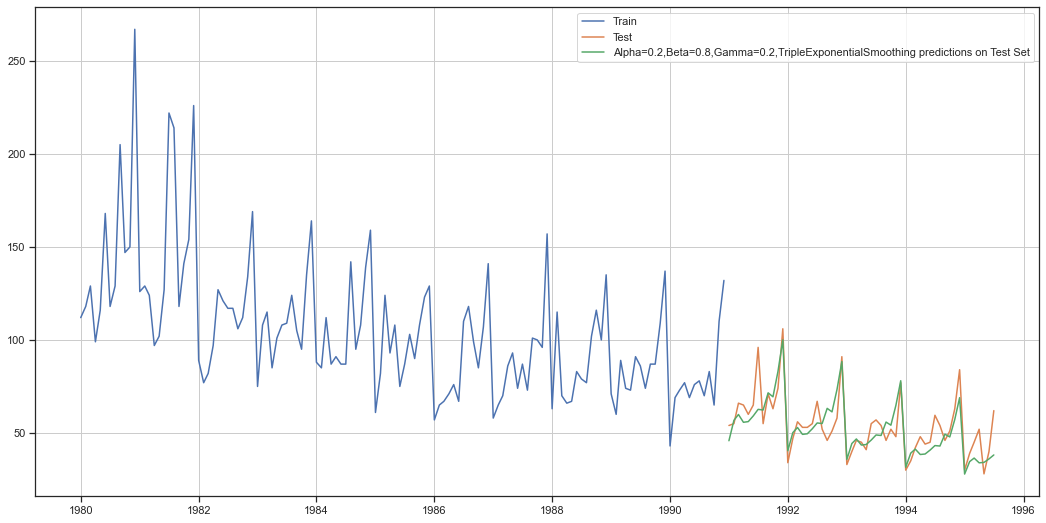

In [259]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict_tm_sm', 0.2, 0.8, 0.2], 
         label='Alpha=0.2,Beta=0.8,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [261]:
resultsDf_7_3 = pd.DataFrame({'Test RMSE': [resultsDf_7_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.2,Beta=0.8,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_3])
resultsDf

,Test RMSE
RegressionOnTime,15.278158
NaiveModel,79.304391
SimpleAverageModel,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.09874,SimpleExponentialSmoothing_Auto_Fit",36.397792
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha=0.1578,Beta=0.1578,DoubleExponentialSmoothing_Auto_Fit",36.397792


# Model 8 - ARIMA

## Check for Stationarity

In [264]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=12).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

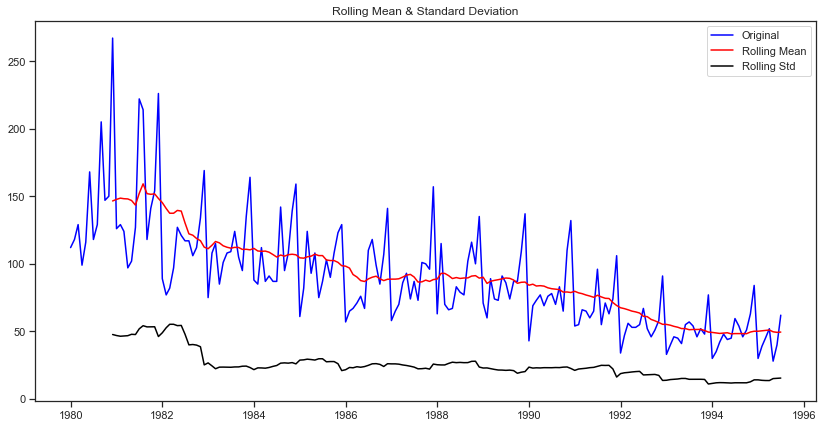

Results of Dickey-Fuller Test:
Test Statistic                  -1.892338
p-value                          0.335674
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [265]:
test_stationarity(df_rose['Sales'])

# H0 - Series is not Stationary
# Ha - Series is Stationary

### We see that at 5% significant level, we fail to reject the null hypothesis and hence the Time Series is non-stationary.

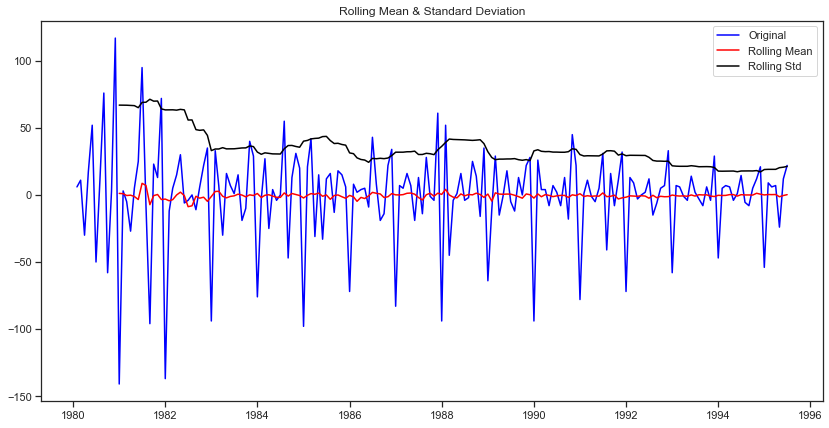

Results of Dickey-Fuller Test:
Test Statistic                -8.032729e+00
p-value                        1.938803e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [266]:
test_stationarity(df_rose['Sales'].diff().dropna())

### After keeping d=1 we can see the series has become stationary

### We see that at $\alpha$ = 0.05 the Time Series is indeed stationary.

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the training data.

In [267]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

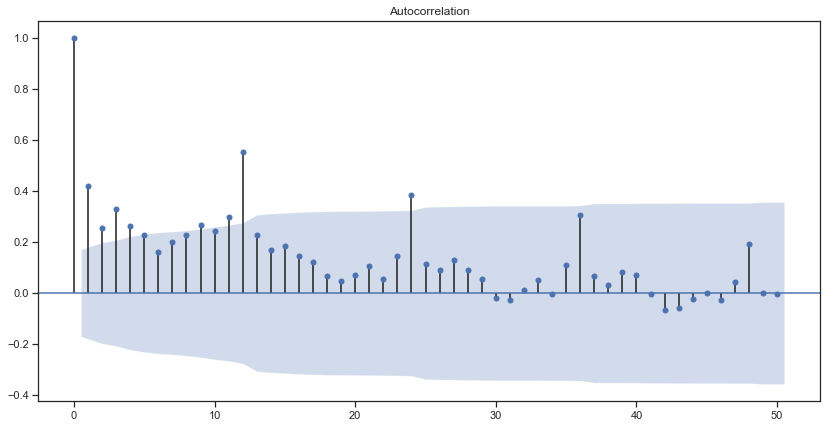

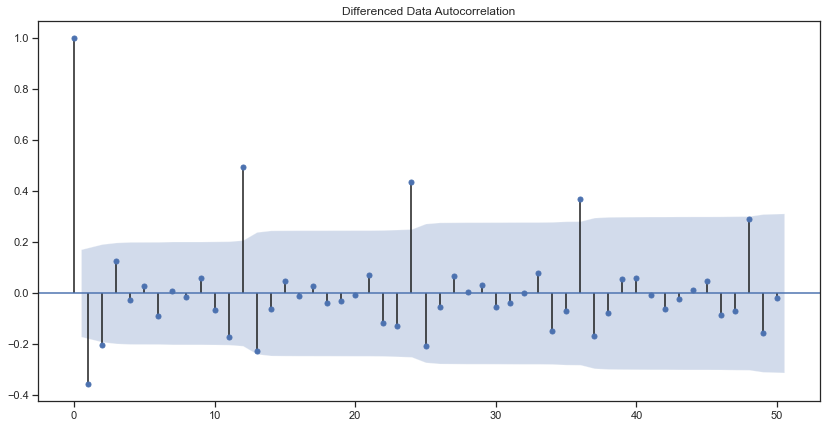

In [362]:
plot_acf(train['Sales'],lags=50)
plot_acf(train['Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

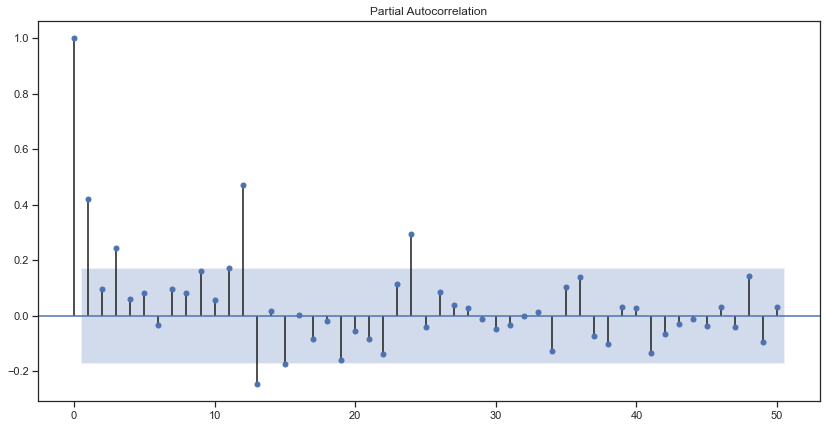

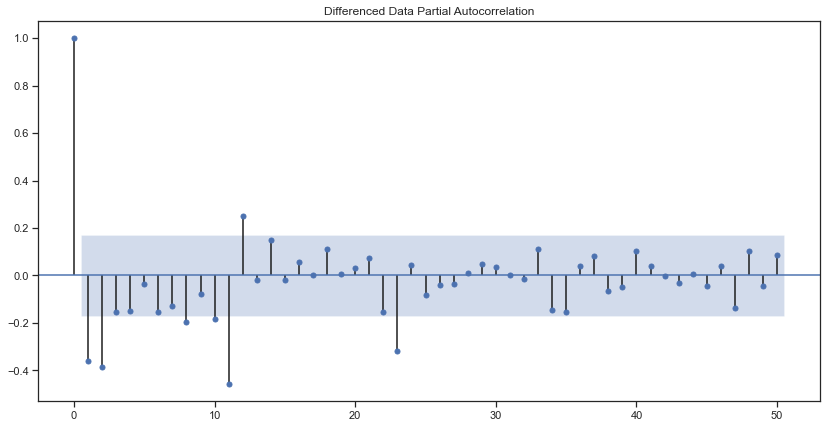

In [364]:
plot_pacf(train['Sales'],lags=50)
plot_pacf(train['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [270]:
print(train.shape)
print(test.shape)In or

(132, 3)
(55, 3)


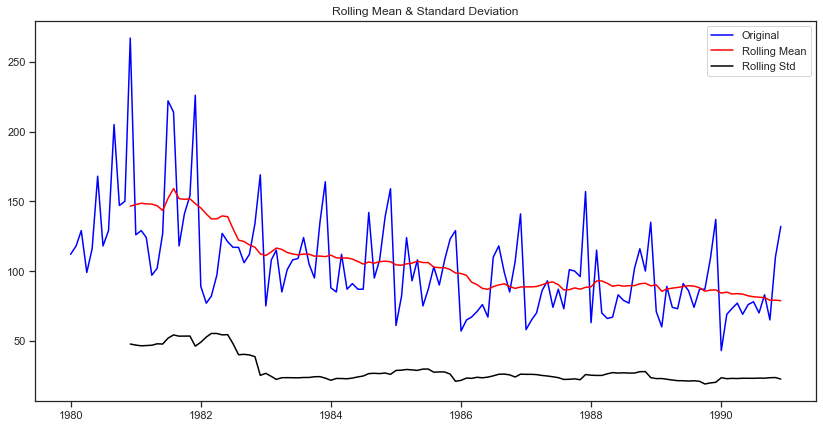

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [271]:
test_stationarity(train['Sales'])

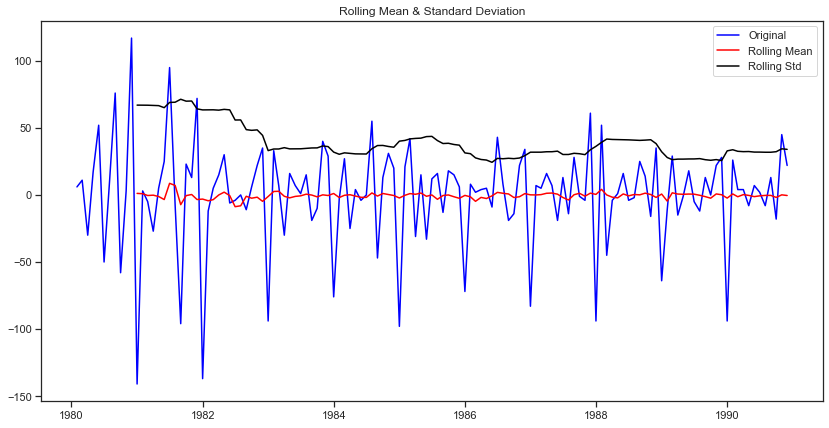

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [272]:
test_stationarity(train['Sales'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05.

In [273]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    132 non-null    int64  
 1   Month   132 non-null    int64  
 2   Sales   132 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 4.1 KB


In [276]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2) #since series is stationary at d=1
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [277]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [278]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464035
ARIMA(0, 1, 2) - AIC:1276.8353724115532
ARIMA(0, 1, 3) - AIC:1278.0742544158697
ARIMA(1, 1, 0) - AIC:1319.3483105803125
ARIMA(1, 1, 1) - AIC:1277.7757493733707
ARIMA(1, 1, 2) - AIC:1277.3592229395217
ARIMA(1, 1, 3) - AIC:1279.3126423526614
ARIMA(2, 1, 0) - AIC:1300.609261174427
ARIMA(2, 1, 1) - AIC:1279.0456894093113
ARIMA(2, 1, 2) - AIC:1279.298693936556
ARIMA(2, 1, 3) - AIC:1281.1962260425298
ARIMA(3, 1, 0) - AIC:1299.478739154304
ARIMA(3, 1, 1) - AIC:1279.6059667722125
ARIMA(3, 1, 2) - AIC:1280.9692448309465
ARIMA(3, 1, 3) - AIC:1273.1941137255676


In [279]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
15,"(3, 1, 3)",1273.194114
2,"(0, 1, 2)",1276.835372
6,"(1, 1, 2)",1277.359223
5,"(1, 1, 1)",1277.775749
3,"(0, 1, 3)",1278.074254
9,"(2, 1, 1)",1279.045689
10,"(2, 1, 2)",1279.298694
7,"(1, 1, 3)",1279.312642
13,"(3, 1, 1)",1279.605967
1,"(0, 1, 1)",1280.726183


In [283]:
auto_ARIMA = ARIMA(train['Sales'], order=(3,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())m


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                  131
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -628.597
Method:                       css-mle   S.D. of innovations             28.355
Date:                Sun, 08 Nov 2020   AIC                           1273.194
Time:                        11:14:36   BIC                           1296.196
Sample:                    02-01-1980   HQIC                          1282.541
                         - 12-01-1990                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.4906      0.088     -5.549      0.000      -0.664      -0.317
ar.L1.D.Sales    -0.7244      0.086     -8.417      0.000      -0.893      -0.556
ar.L2.D.Sales    -0.7219      0.086     

### Predict

In [284]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [318]:
predicted_auto_ARIMA[0]

array([74.73923178, 75.51972141, 81.71172175, 59.78087235, 70.34942552,
       79.17093055, 58.02806509, 68.83121213, 77.64024869, 56.55472148,
       67.39013213, 76.13095805, 55.08739266, 65.95055839, 74.62214286,
       53.62029345, 64.51089115, 73.11336098, 52.15330103, 63.07109667,
       71.60460339, 50.68641238, 61.63117433, 70.09587023, 49.219627  ,
       60.19112424, 68.58716181, 47.75294444, 58.75094649, 67.07847848,
       46.28636427, 57.31064121, 65.56982055, 44.81988604, 55.87020849,
       64.06118837, 43.35350932, 54.42964847, 62.55258224, 41.88723367,
       52.98896123, 61.04400251, 40.42105865, 51.54814692, 59.53544949,
       38.95498381, 50.10720563, 58.0269235 , 37.48900873, 48.66613748,
       56.51842487, 36.02313297, 47.2249426 , 55.00995391, 34.55735609])

In [286]:
from sklearn.metrics import  mean_squared_error
rmse_auto_arima = mean_squared_error(test['Sales'],predicted_auto_ARIMA[0],squared=False)
print(rmse_auto_arima)

16.161570389787453


In [287]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': rmse_auto_arima}
                           ,index=['p=3,d=1,q=3,Auto_ARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
RegressionOnTime,15.278158
NaiveModel,79.304391
SimpleAverageModel,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.09874,SimpleExponentialSmoothing_Auto_Fit",36.397792
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha=0.1578,Beta=0.1578,DoubleExponentialSmoothing_Auto_Fit",36.397792


# Model 9 - SARIMA

In [291]:
import itertools
p = q = range(0, 4)
d= range(0,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 2)(0, 0, 2, 12)
Model: (0, 0, 3)(0, 0, 3, 12)
Model: (0, 1, 0)(0, 1, 0, 12)
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 0, 0)(1, 0, 0, 12)
Model: (1, 0, 1)(1, 0, 1, 12)
Model: (1, 0, 2)(1, 0, 2, 12)
Model: (1, 0, 3)(1, 0, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 0, 0)(2, 0, 0, 12)
Model: (2, 0, 1)(2, 0, 1, 12)
Model: (2, 0, 2)(2, 0, 2, 12)
Model: (2, 0, 3)(2, 0, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 0, 0)(3, 0, 0, 12)
Model: (3, 0, 1)(3, 0, 1, 12)
Model: (3, 0, 2)(3, 0, 2, 12)
Model: (3, 0, 3)(3, 0, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [292]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [293]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:1607.5307543879908
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1342.8879796320107
SARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:1127.6939671247558
SARIMA(0, 0, 0)x(0, 0, 3, 12) - AIC:4675.004623009335
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1132.3491004641107
SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:973.2839647242826
SARIMA(0, 0, 0)x(0, 1, 2, 12) - AIC:819.2632583151624
SARIMA(0, 0, 0)x(0, 1, 3, 12) - AIC:3089.2277133511307
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1123.327544387293
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1072.6552135795753
SARIMA(0, 0, 0)x(1, 0, 2, 12) - AIC:947.5166316766521
SARIMA(0, 0, 0)x(1, 0, 3, 12) - AIC:3032.2209567416057
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:982.5608243528003
SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:970.9074505848774
SARIMA(0, 0, 0)x(1, 1, 2, 12) - AIC:821.120480644783
SARIMA(0, 0, 0)x(1, 1, 3, 12) - AIC:3422.5228235343116
SARIMA(0, 0, 0)x(2, 0, 0, 12) - AIC:939.9681316162018
SARIMA(0, 0, 0)x(2, 0, 1, 12) - AIC:941.4830987727393
SARIMA(0, 0, 0)x(2, 0

SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.7482702659753
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.5304136128227
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3508.248632580428
SARIMA(0, 1, 0)x(3, 1, 0, 12) - AIC:752.3958122739787
SARIMA(0, 1, 0)x(3, 1, 1, 12) - AIC:748.3165246489017
SARIMA(0, 1, 0)x(3, 1, 2, 12) - AIC:748.9721713374411
SARIMA(0, 1, 0)x(3, 1, 3, 12) - AIC:3254.631799523603
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383966
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918337
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383856
SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:4062.4317156226107
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1113.7663133560354
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:915.0730606717683
SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:790.9032809266845
SARIMA(0, 1, 1)x(0, 1, 3, 12) - AIC:3409.138731933142
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918244
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330946915
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483309149
SARIMA(0, 1, 1)x(1, 0,

SARIMA(1, 0, 1)x(2, 0, 1, 12) - AIC:934.0304480199094
SARIMA(1, 0, 1)x(2, 0, 2, 12) - AIC:916.3527649967999
SARIMA(1, 0, 1)x(2, 0, 3, 12) - AIC:787.0858356331262
SARIMA(1, 0, 1)x(2, 1, 0, 12) - AIC:807.910543940061
SARIMA(1, 0, 1)x(2, 1, 1, 12) - AIC:803.8435627162073
SARIMA(1, 0, 1)x(2, 1, 2, 12) - AIC:791.1083603830452
SARIMA(1, 0, 1)x(2, 1, 3, 12) - AIC:3514.8099976725034
SARIMA(1, 0, 1)x(3, 0, 0, 12) - AIC:801.5911069458937
SARIMA(1, 0, 1)x(3, 0, 1, 12) - AIC:796.4440625476053
SARIMA(1, 0, 1)x(3, 0, 2, 12) - AIC:794.8367671009636
SARIMA(1, 0, 1)x(3, 0, 3, 12) - AIC:787.0272855351279
SARIMA(1, 0, 1)x(3, 1, 0, 12) - AIC:705.7339670359698
SARIMA(1, 0, 1)x(3, 1, 1, 12) - AIC:701.2798729117145
SARIMA(1, 0, 1)x(3, 1, 2, 12) - AIC:713.2129857720327
SARIMA(1, 0, 1)x(3, 1, 3, 12) - AIC:3061.894583113958
SARIMA(1, 0, 2)x(0, 0, 0, 12) - AIC:1258.7656242385754
SARIMA(1, 0, 2)x(0, 0, 1, 12) - AIC:1088.1787551090413
SARIMA(1, 0, 2)x(0, 0, 2, 12) - AIC:919.2998998490708
SARIMA(1, 0, 2)x(0, 0, 3, 

SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1042.6183211673824
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:906.7318501710643
SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:3366.2595049407514
SARIMA(1, 1, 2)x(1, 1, 0, 12) - AIC:934.8870392437815
SARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:917.2527818407256
SARIMA(1, 1, 2)x(1, 1, 2, 12) - AIC:787.7843970223087
SARIMA(1, 1, 2)x(1, 1, 3, 12) - AIC:3458.456189578692
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:906.1690196289219
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:907.4597830286441
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:896.6868966071174
SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3191.3482019931
SARIMA(1, 1, 2)x(2, 1, 0, 12) - AIC:801.938205214417
SARIMA(1, 1, 2)x(2, 1, 1, 12) - AIC:791.9171138913287
SARIMA(1, 1, 2)x(2, 1, 2, 12) - AIC:776.9401070999595
SARIMA(1, 1, 2)x(2, 1, 3, 12) - AIC:3470.011952373069
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:791.007380149192
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:792.6312809550594
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:792.1390262298487
SARIMA(1, 1, 2)x(3, 0, 3, 12) 

SARIMA(2, 0, 3)x(0, 0, 1, 12) - AIC:1088.1942359403897
SARIMA(2, 0, 3)x(0, 0, 2, 12) - AIC:935.2727590984803
SARIMA(2, 0, 3)x(0, 0, 3, 12) - AIC:3663.180196956603
SARIMA(2, 0, 3)x(0, 1, 0, 12) - AIC:1094.586111222568
SARIMA(2, 0, 3)x(0, 1, 1, 12) - AIC:899.5292127468364
SARIMA(2, 0, 3)x(0, 1, 2, 12) - AIC:780.881525456876
SARIMA(2, 0, 3)x(0, 1, 3, 12) - AIC:2804.9070892767636
SARIMA(2, 0, 3)x(1, 0, 0, 12) - AIC:1087.0283658327567
SARIMA(2, 0, 3)x(1, 0, 1, 12) - AIC:1045.5269123853875
SARIMA(2, 0, 3)x(1, 0, 2, 12) - AIC:919.2865439622431
SARIMA(2, 0, 3)x(1, 0, 3, 12) - AIC:8632.365467449585
SARIMA(2, 0, 3)x(1, 1, 0, 12) - AIC:929.4028301084508
SARIMA(2, 0, 3)x(1, 1, 1, 12) - AIC:912.1014656911004
SARIMA(2, 0, 3)x(1, 1, 2, 12) - AIC:784.4192980371427
SARIMA(2, 0, 3)x(1, 1, 3, 12) - AIC:2811.7064707245045
SARIMA(2, 0, 3)x(2, 0, 0, 12) - AIC:909.9814953327317
SARIMA(2, 0, 3)x(2, 0, 1, 12) - AIC:913.0135778316275
SARIMA(2, 0, 3)x(2, 0, 2, 12) - AIC:913.9183803570126
SARIMA(2, 0, 3)x(2, 0, 3

SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:783.4101484643613
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:781.0452499758296
SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3508.590779457007
SARIMA(2, 1, 3)x(3, 1, 0, 12) - AIC:694.58585056464
SARIMA(2, 1, 3)x(3, 1, 1, 12) - AIC:691.0770818182441
SARIMA(2, 1, 3)x(3, 1, 2, 12) - AIC:692.3249935323057
SARIMA(2, 1, 3)x(3, 1, 3, 12) - AIC:3247.077935541973
SARIMA(3, 0, 0)x(0, 0, 0, 12) - AIC:1281.26484891989
SARIMA(3, 0, 0)x(0, 0, 1, 12) - AIC:1137.577133982503
SARIMA(3, 0, 0)x(0, 0, 2, 12) - AIC:970.2203786022262
SARIMA(3, 0, 0)x(0, 0, 3, 12) - AIC:4094.285200790904
SARIMA(3, 0, 0)x(0, 1, 0, 12) - AIC:1107.907257728206
SARIMA(3, 0, 0)x(0, 1, 1, 12) - AIC:948.4155060460297
SARIMA(3, 0, 0)x(0, 1, 2, 12) - AIC:821.1130853876293
SARIMA(3, 0, 0)x(0, 1, 3, 12) - AIC:3352.886416527597
SARIMA(3, 0, 0)x(1, 0, 0, 12) - AIC:1090.7400547203335
SARIMA(3, 0, 0)x(1, 0, 1, 12) - AIC:1054.3777424039126
SARIMA(3, 0, 0)x(1, 0, 2, 12) - AIC:941.5101881857896
SARIMA(3, 0, 0)x(1, 0, 3, 12)

SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:911.06207139765
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:913.0438816472877
SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:2394.414711866439
SARIMA(3, 1, 0)x(2, 1, 0, 12) - AIC:803.7674514642814
SARIMA(3, 1, 0)x(2, 1, 1, 12) - AIC:794.8634035282494
SARIMA(3, 1, 0)x(2, 1, 2, 12) - AIC:796.6369790758642
SARIMA(3, 1, 0)x(2, 1, 3, 12) - AIC:3745.0936374431653
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:796.0564701527544
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:795.5410167662325
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:794.6677017215648
SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3448.852166977995
SARIMA(3, 1, 0)x(3, 1, 0, 12) - AIC:704.8546570596768
SARIMA(3, 1, 0)x(3, 1, 1, 12) - AIC:696.8642292294223
SARIMA(3, 1, 0)x(3, 1, 2, 12) - AIC:699.0912757459557
SARIMA(3, 1, 0)x(3, 1, 3, 12) - AIC:3475.910448691405
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:1255.0658180709388
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1095.6894641190868
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:923.887242754724
SARIMA(3, 1, 1)x(0, 0, 3, 12

In [294]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
957,"(3, 1, 1)","(3, 1, 1, 12)",681.362811
1021,"(3, 1, 3)","(3, 1, 1, 12)",681.607517
1022,"(3, 1, 3)","(3, 1, 2, 12)",681.983927
958,"(3, 1, 1)","(3, 1, 2, 12)",682.320704
989,"(3, 1, 2)","(3, 1, 1, 12)",683.211699


In [295]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood                -331.681
Date:                            Sun, 08 Nov 2020   AIC                            681.363
Time:                                    12:22:03   BIC                            702.801
Sample:                                         0   HQIC                           689.958
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0173      0.151      0.114      0.909      -0.279       0.314
ar.L2         -0.0427      0.141   

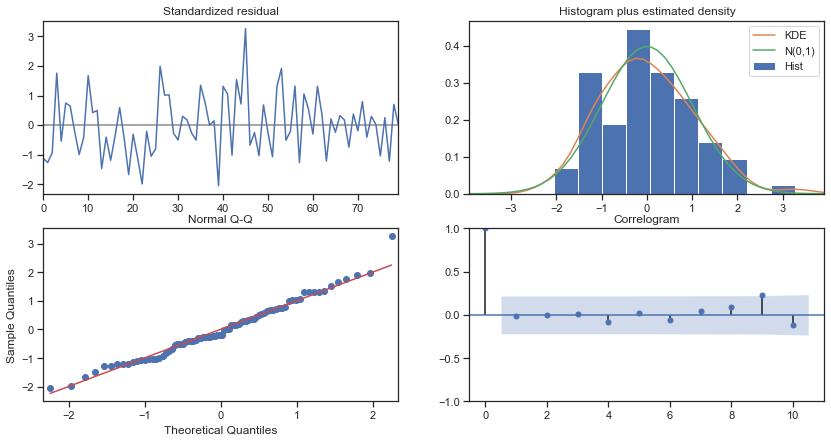

In [296]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [297]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [320]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,45.222979,14.458697,16.884453,73.561506
1,63.055806,14.503613,34.629248,91.482364
2,68.115632,14.453643,39.787012,96.444252
3,61.824172,14.449891,33.502906,90.145437
4,68.436098,14.470400,40.074635,96.797562


In [323]:
rmse_auto_SARIMA = mean_squared_error(test['Sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse_auto_SARIMA)

16.57583296467226


In [303]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse_auto_SARIMA}
                           ,index=['(3,1,1),(3,1,1,12),Auto_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

,Test RMSE
RegressionOnTime,15.278158
NaiveModel,79.304391
SimpleAverageModel,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.09874,SimpleExponentialSmoothing_Auto_Fit",36.397792
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha=0.1578,Beta=0.1578,DoubleExponentialSmoothing_Auto_Fit",36.397792


# Model 10 - Manual ARIMA

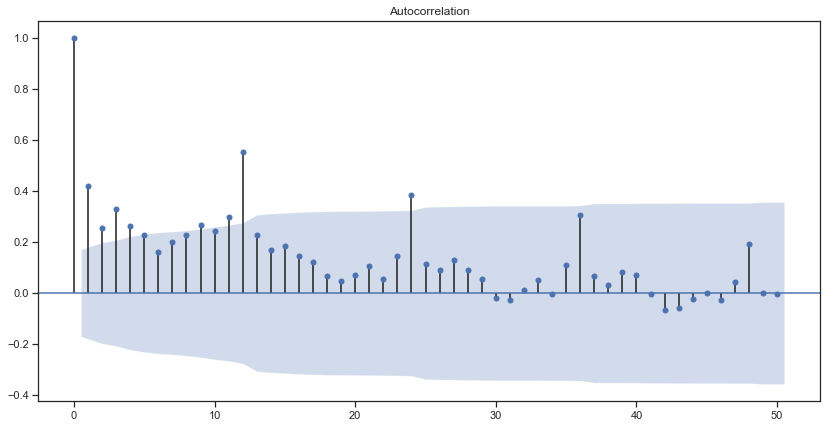

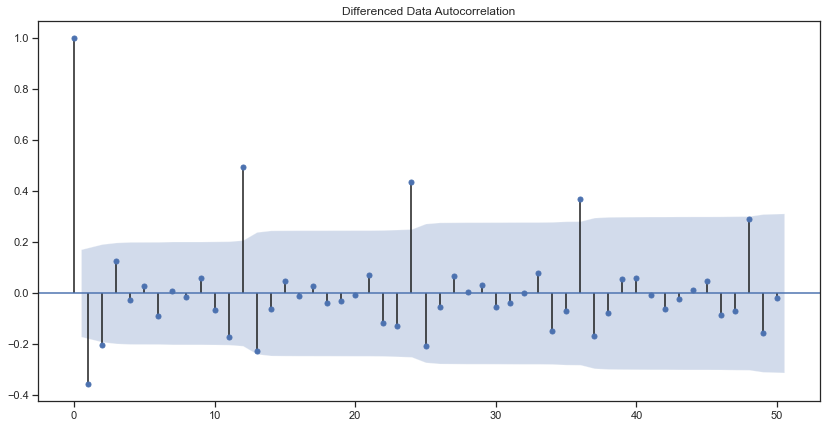

In [365]:
plot_acf(train['Sales'],lags=50)
plot_acf(train['Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

Looking at the ACF plot for original data we can see the decay is very gradual and hence the threshold value is not very clear. In such situtions it is recommended to look at the ACF plot for differenced data series. Hence we then ploted the ACF graph for the time series with diff = 1. Loking at the ACF plot of differenced data, we can see the value is getting decresed dramatically after lag 2, hence p = 2 has been choosen.

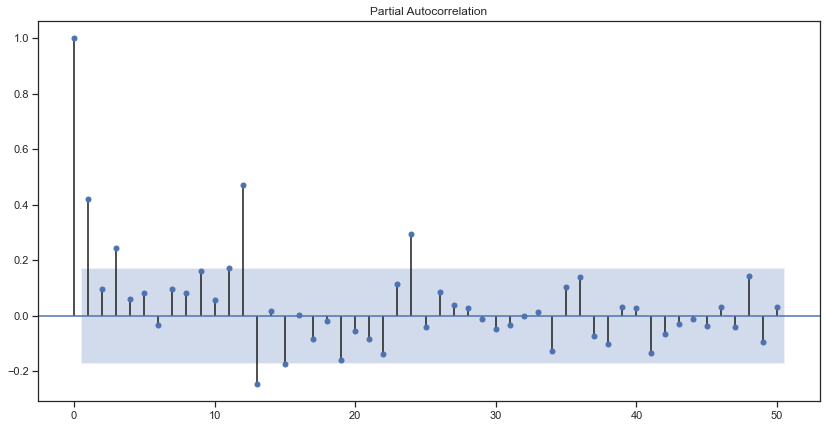

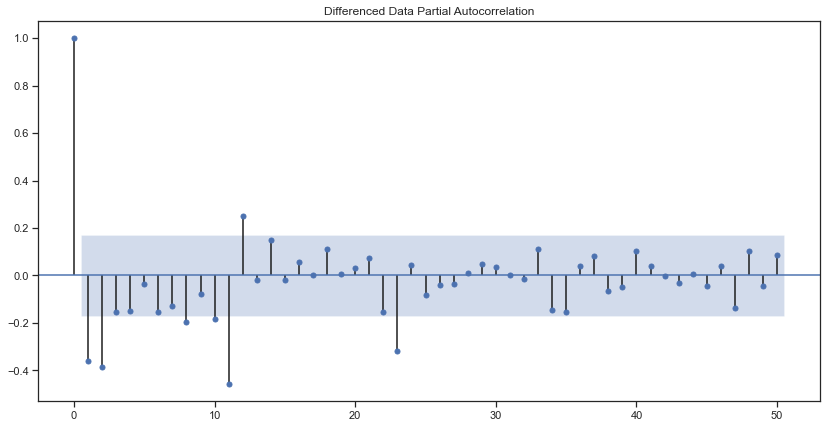

In [366]:
plot_pacf(train['Sales'],lags=50)
plot_pacf(train['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Looking at the PCF plot of original series, as well as the differenced series (diff = 1), we can see there is a sharp drop till lag = 2. Hence we consider q = 2 in this case.

We had earlier seen that to make the series stationary we had to take a difference of 1. Hence the value of d will be 1. i.e. d=1

In [367]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [368]:
param=(2,1,2)
ARIMA_model = ARIMA(train['Sales'].values,order=param).fit()
print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(2, 1, 2) - AIC:1279.298693936556


In [369]:
ARIMA_AIC

,param,AIC
0,"(2, 1, 2)",1279.298694


In [370]:
predicted_manual_ARIMA = ARIMA_model.forecast(steps=len(test))

In [374]:
print(ARIMA_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -633.649
Method:                       css-mle   S.D. of innovations             29.975
Date:                Sun, 08 Nov 2020   AIC                           1279.299
Time:                        22:00:28   BIC                           1296.550
Sample:                             1   HQIC                          1286.309
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4911      0.081     -6.076      0.000      -0.649      -0.333
ar.L1.D.y     -0.4383      0.218     -2.015      0.044      -0.865      -0.012
ar.L2.D.y      0.0269      0.109      0.246      0.8

In [371]:
predicted_manual_ARIMA[0]

array([79.42147771, 69.46569568, 71.72346914, 69.77310333, 69.99557145,
       69.15250804, 68.83490362, 68.25833385, 67.80940042, 67.2975593 ,
       66.81672331, 66.32060591, 65.83202021, 65.33972239, 64.84925415,
       64.35788417, 63.86695862, 63.37581403, 62.8847774 , 62.39368756,
       61.90262395, 61.41154741, 60.92047724, 60.42940393, 59.93833216,
       59.44725964, 58.95618749, 58.46511516, 57.97404291, 57.48297062,
       56.99189836, 56.50082608, 56.00975381, 55.51868154, 55.02760926,
       54.53653699, 54.04546472, 53.55439244, 53.06332017, 52.5722479 ,
       52.08117562, 51.59010335, 51.09903108, 50.6079588 , 50.11688653,
       49.62581426, 49.13474198, 48.64366971, 48.15259744, 47.66152516,
       47.17045289, 46.67938062, 46.18830835, 45.69723607, 45.2061638 ])

In [372]:
rmse_manual_ARIMA = mean_squared_error(test['Sales'],predicted_manual_ARIMA[0],squared=False)
print(rmse_manual_ARIMA)

15.369329246210828


In [327]:
resultsDf_10_1 = pd.DataFrame({'Test RMSE': rmse_manual_ARIMA}
                           ,index=['(2,1,2),Manual_ARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_10_1])
resultsDf

,Test RMSE
RegressionOnTime,15.278158
NaiveModel,79.304391
SimpleAverageModel,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.09874,SimpleExponentialSmoothing_Auto_Fit",36.397792
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha=0.1578,Beta=0.1578,DoubleExponentialSmoothing_Auto_Fit",36.397792


# Model 11 - Manual SARIMA

Keeping the p,D,q values the same, we can see considerable spikes at lags, 12,24,36,48 etc. Also looking at the correlation heatmap between various lags we could see warmer regions between lag 1 and lag13 i.e. difference of 12, and so and so forth.
Hence we take seasonality to be 12 in this case.

p = 2
D = 1
q = 2
S = 12

In [375]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [376]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -379.498
Date:                            Sun, 08 Nov 2020   AIC                            776.996
Time:                                    22:05:19   BIC                            799.692
Sample:                                         0   HQIC                           786.156
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8551      0.146     -5.838      0.000      -1.142      -0.568
ar.L2         -0.0022      0.125   

In [377]:
SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_manual_SARIMA.aic},
                               ignore_index=True)
SARIMA_AIC

,param,seasonal,AIC
0,"(2, 1, 2)","(3, 1, 3, 12)",776.996099


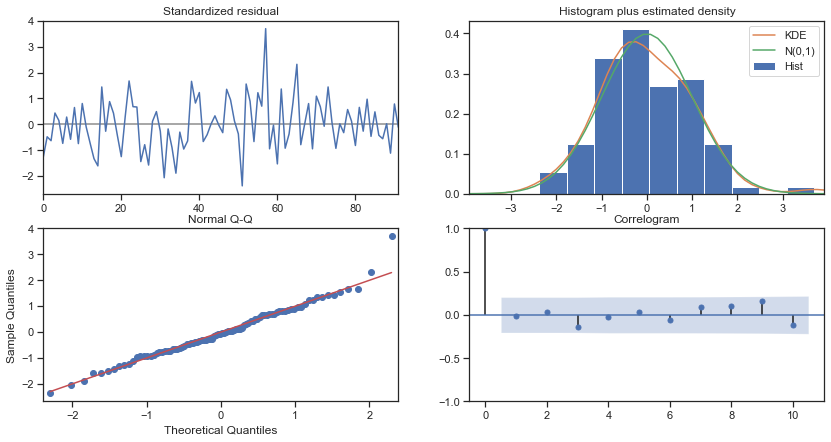

In [378]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [379]:
predicted_manual_SARIMA_6 = results_manual_SARIMA.get_forecast(steps=len(test))

In [380]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,43.035642,14.000494,15.595178,70.476107
1,64.087531,14.166532,36.321638,91.853423
2,66.204163,14.185029,38.402017,94.006309
3,64.056597,14.289130,36.050417,92.062778
4,65.403036,14.291055,37.393082,93.412990


In [381]:
rmse_manual_sarima = mean_squared_error(test['Sales'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse_manual_sarima)

16.295094721026974


In [384]:
resultsDf_10_1 = pd.DataFrame({'Test RMSE': rmse_manual_sarima}
                           ,index=['(2,1,2)(2,1,2,12),Manual_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_10_1])
resultsDf

,Test RMSE
RegressionOnTime,15.278158
NaiveModel,79.304391
SimpleAverageModel,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.09874,SimpleExponentialSmoothing_Auto_Fit",36.397792
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha=0.1578,Beta=0.1578,DoubleExponentialSmoothing_Auto_Fit",36.397792


# Comparison of all Models

In [385]:
resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE
"Alpha=0.2,Beta=0.8,Gamma=0.2,TripleExponentialSmoothing",9.454552
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
RegressionOnTime,15.278158
"(2,1,2),Manual_ARIMA",15.369329
"p=3,d=1,q=3,Auto_ARIMA",16.161570
"(2,1,2)(2,1,2,12),Manual_SARIMA",16.295095
"(3,1,1),(3,1,1,12),Auto_SARIMA",16.575833


In [349]:
df_rose.head()

,Year,Month,Sales
YearMonth,,,
1980-01-01,1980,1,112.0
1980-02-01,1980,2,118.0
1980-03-01,1980,3,129.0
1980-04-01,1980,4,99.0
1980-05-01,1980,5,116.0


In [349]:
df_rose.head()

,Year,Month,Sales
YearMonth,,,
1980-01-01,1980,1,112.0
1980-02-01,1980,2,118.0
1980-03-01,1980,3,129.0
1980-04-01,1980,4,99.0
1980-05-01,1980,5,116.0


## Looking at the RMSE figures we can conclude that the Tripple Exponential Smoothing or the Holt - Winters Model is the most optimized model and hence future predictions will be done using this model.

In [338]:
date = pd.date_range(start='8/1/1995', end='7/1/1996', freq='MS')
date

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [339]:
future_predictions=pd.DataFrame(columns=['Sales_Predictions'],index=date)

## Predicition using Tripple Exponential Smoothening Model

In [386]:
TES_train = df_rose.copy()

We will use Trend=Multiplicative and Seasonality=Multiplicative since this is the model which gave us the best results earlier in the training phase. 

In [387]:
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')

In [388]:
alpha=0.2
beta=0.8
gamma=0.2
model_TES = model_TES_tm_sm.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma,
                                optimized=False,use_brute=True)

In [389]:
prediction=model_TES.forecast(steps=12)

In [390]:
future_predictions['Sales_Predictions']=prediction

In [391]:
future_predictions

,Sales_Predictions
1995-08-01,35.553959
1995-09-01,35.179772
1995-10-01,36.588317
1995-11-01,43.635943
1995-12-01,63.073500
1996-01-01,25.031723
1996-02-01,32.583791
1996-03-01,39.229308
1996-04-01,41.675073
1996-05-01,35.397941


In [392]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(model_TES.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(model_TES.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,-17.130807,35.553959,88.238726
1995-09-01,-17.504995,35.179772,87.864538
1995-10-01,-16.096449,36.588317,89.273084
1995-11-01,-9.048824,43.635943,96.320709
1995-12-01,10.388734,63.073500,115.758267


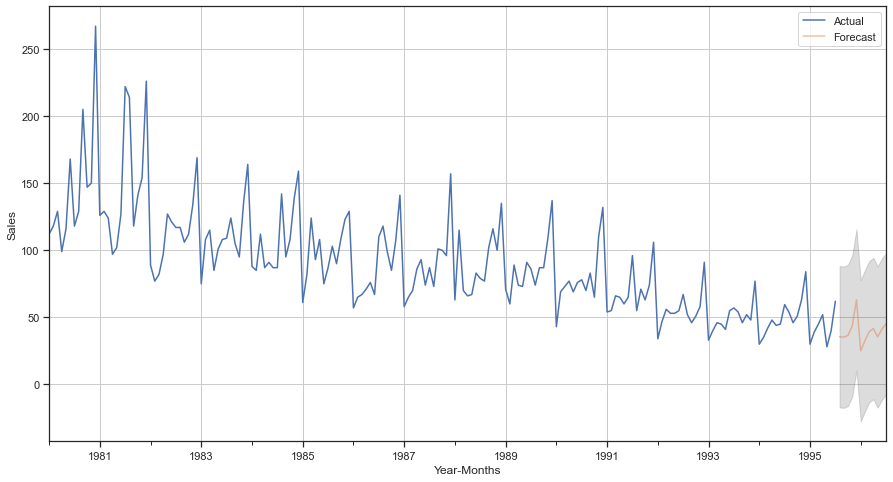

In [393]:
# plot the forecast along with the confidence band

axis = df_rose['Sales'].plot(label='Actual', figsize=(15,8))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()